## EXP_2467_seq_prune_08_2_32_run(1-10)
Dan Cox May 2021 CS299 Project

#### Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import warnings
from collections import OrderedDict

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Reshape
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import tempfile
import n_cut.n_cut as nc
import n_cut.MNIST_helper as mh

#### Make experiments dict

In [2]:
exp_dict = OrderedDict()

#### Get MNIST data

In [3]:
# Get mnist data split into train and test 60000 x 28 x 28 train, 10000 x 28 x28 test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

#### Run experiment many times (num_runs)

run 0
Instructions for updating:
Please use `layer.add_weight` method instead.
round0 [7 2 4 6]
7
Epoch 1/5
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1250/1250 - 3s - loss: 0.0880 - accuracy: 0.9725 - val_loss: 0.0522 - val_accuracy: 0.9859
Epoch 2/5
1250/1250 - 3s - loss: 0.0264 - accuracy: 0.9927 - val_loss: 0.0428 - val_accuracy: 0.9875
Epoch 3/5
1250/1250 - 3s - loss: 0.0174 - accuracy: 0.9951 - val_loss: 0.0393 - val_accuracy: 0.9867
Epoch 4/5
1250/1250 - 3s - loss: 0.0102 - accuracy: 0.9968 - val_loss: 0.0416 - val_accuracy: 0.9859
Epoch 5/5
1250/1250 - 3s - loss: 0.0057 - accuracy: 0.9987 - val_loss: 0.0445 - val_accuracy: 0.9875


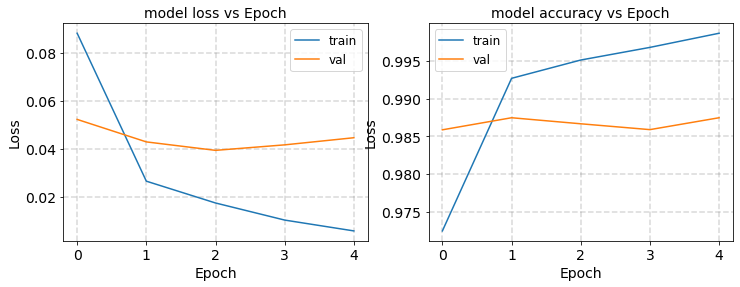

2
Epoch 1/5
1250/1250 - 3s - loss: 0.2633 - accuracy: 0.9349 - val_loss: 0.1230 - val_accuracy: 0.9741
Epoch 2/5
1250/1250 - 3s - loss: 0.0914 - accuracy: 0.9808 - val_loss: 0.0821 - val_accuracy: 0.9820
Epoch 3/5
1250/1250 - 3s - loss: 0.0571 - accuracy: 0.9873 - val_loss: 0.0652 - val_accuracy: 0.9827
Epoch 4/5
1250/1250 - 3s - loss: 0.0383 - accuracy: 0.9915 - val_loss: 0.0586 - val_accuracy: 0.9843
Epoch 5/5
1250/1250 - 3s - loss: 0.0262 - accuracy: 0.9941 - val_loss: 0.0582 - val_accuracy: 0.9851


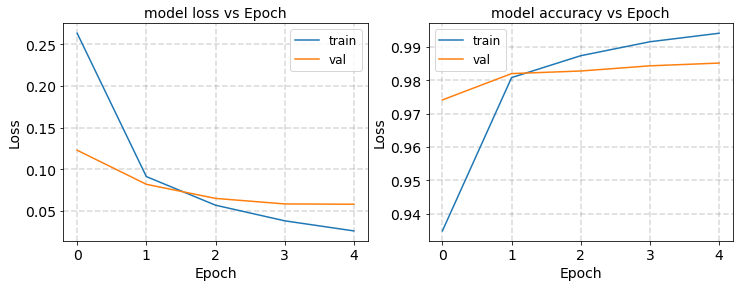

4
Epoch 1/5
1250/1250 - 3s - loss: 0.3117 - accuracy: 0.9018 - val_loss: 0.0655 - val_accuracy: 0.9789
Epoch 2/5
1250/1250 - 3s - loss: 0.0527 - accuracy: 0.9840 - val_loss: 0.0546 - val_accuracy: 0.9860
Epoch 3/5
1250/1250 - 3s - loss: 0.0357 - accuracy: 0.9896 - val_loss: 0.0470 - val_accuracy: 0.9859
Epoch 4/5
1250/1250 - 3s - loss: 0.0262 - accuracy: 0.9932 - val_loss: 0.0445 - val_accuracy: 0.9867
Epoch 5/5
1250/1250 - 3s - loss: 0.0198 - accuracy: 0.9949 - val_loss: 0.0421 - val_accuracy: 0.9875


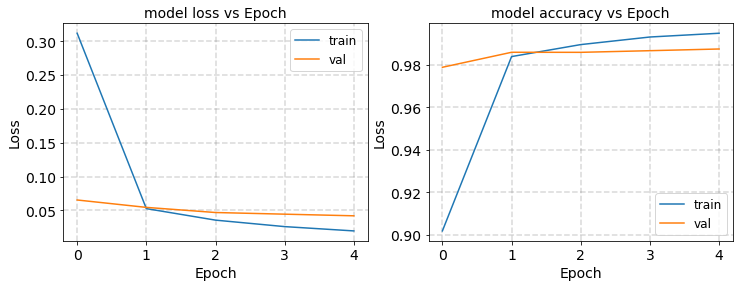

6
Epoch 1/5
1250/1250 - 4s - loss: 0.1319 - accuracy: 0.9639 - val_loss: 0.0426 - val_accuracy: 0.9889
Epoch 2/5
1250/1250 - 3s - loss: 0.0241 - accuracy: 0.9922 - val_loss: 0.0392 - val_accuracy: 0.9888
Epoch 3/5
1250/1250 - 3s - loss: 0.0150 - accuracy: 0.9955 - val_loss: 0.0390 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 3s - loss: 0.0097 - accuracy: 0.9971 - val_loss: 0.0377 - val_accuracy: 0.9912
Epoch 5/5
1250/1250 - 3s - loss: 0.0064 - accuracy: 0.9987 - val_loss: 0.0397 - val_accuracy: 0.9905


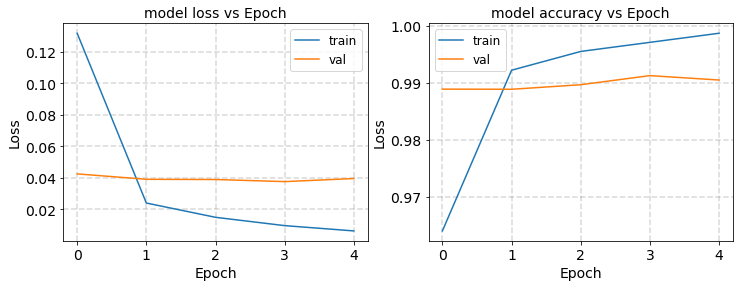

round1 [4 7 6 2]
4
Epoch 1/5
1250/1250 - 4s - loss: 0.2228 - accuracy: 0.9470 - val_loss: 0.0758 - val_accuracy: 0.9766
Epoch 2/5
1250/1250 - 3s - loss: 0.0597 - accuracy: 0.9835 - val_loss: 0.0600 - val_accuracy: 0.9836
Epoch 3/5
1250/1250 - 3s - loss: 0.0457 - accuracy: 0.9867 - val_loss: 0.0548 - val_accuracy: 0.9875
Epoch 4/5
1250/1250 - 3s - loss: 0.0332 - accuracy: 0.9892 - val_loss: 0.0552 - val_accuracy: 0.9875
Epoch 5/5
1250/1250 - 3s - loss: 0.0195 - accuracy: 0.9945 - val_loss: 0.0569 - val_accuracy: 0.9859


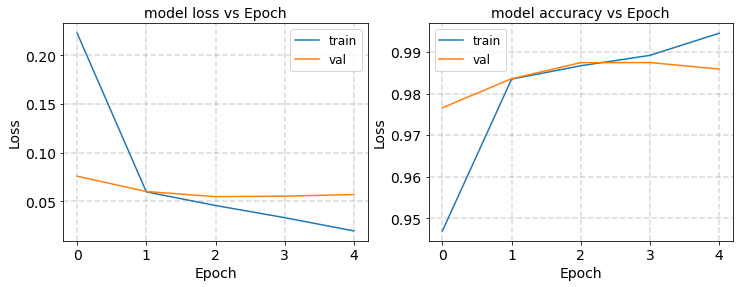

7
Epoch 1/5
1250/1250 - 3s - loss: 0.2214 - accuracy: 0.9515 - val_loss: 0.0755 - val_accuracy: 0.9820
Epoch 2/5
1250/1250 - 3s - loss: 0.0164 - accuracy: 0.9962 - val_loss: 0.0618 - val_accuracy: 0.9859
Epoch 3/5
1250/1250 - 3s - loss: 0.0100 - accuracy: 0.9979 - val_loss: 0.0564 - val_accuracy: 0.9875
Epoch 4/5
1250/1250 - 3s - loss: 0.0060 - accuracy: 0.9992 - val_loss: 0.0545 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 3s - loss: 0.0037 - accuracy: 0.9996 - val_loss: 0.0570 - val_accuracy: 0.9882


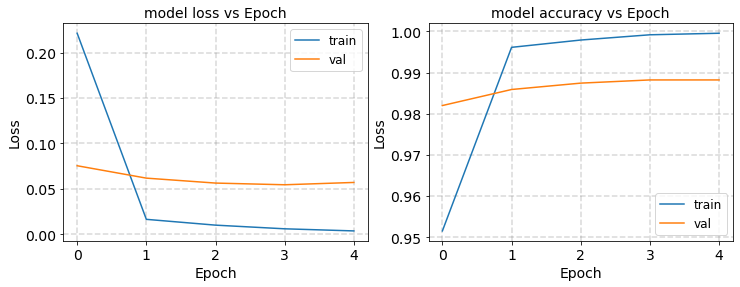

6
Epoch 1/5
1250/1250 - 3s - loss: 0.3254 - accuracy: 0.9368 - val_loss: 0.0582 - val_accuracy: 0.9803
Epoch 2/5
1250/1250 - 3s - loss: 0.0415 - accuracy: 0.9886 - val_loss: 0.0461 - val_accuracy: 0.9811
Epoch 3/5
1250/1250 - 4s - loss: 0.0292 - accuracy: 0.9926 - val_loss: 0.0424 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 4s - loss: 0.0221 - accuracy: 0.9948 - val_loss: 0.0409 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 4s - loss: 0.0172 - accuracy: 0.9959 - val_loss: 0.0414 - val_accuracy: 0.9810


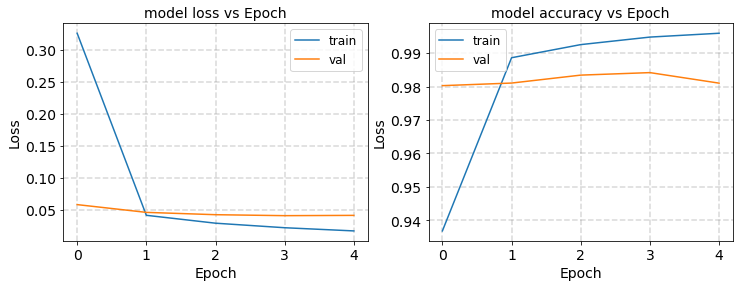

2
Epoch 1/5
1250/1250 - 4s - loss: 0.3013 - accuracy: 0.9219 - val_loss: 0.1016 - val_accuracy: 0.9639
Epoch 2/5
1250/1250 - 4s - loss: 0.0755 - accuracy: 0.9749 - val_loss: 0.0952 - val_accuracy: 0.9694
Epoch 3/5
1250/1250 - 3s - loss: 0.0570 - accuracy: 0.9817 - val_loss: 0.0907 - val_accuracy: 0.9733
Epoch 4/5
1250/1250 - 3s - loss: 0.0472 - accuracy: 0.9858 - val_loss: 0.0887 - val_accuracy: 0.9733
Epoch 5/5
1250/1250 - 4s - loss: 0.0406 - accuracy: 0.9873 - val_loss: 0.0884 - val_accuracy: 0.9741


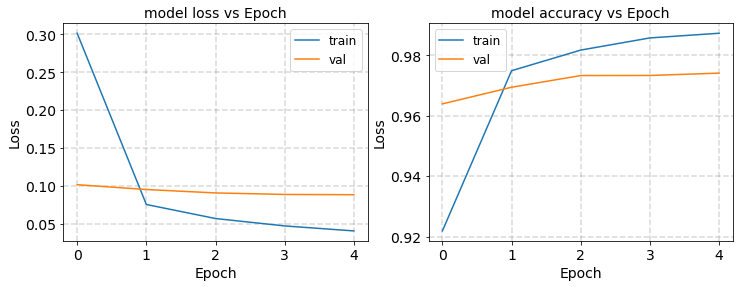

round2 [2 6 7 4]
2
Epoch 1/5
1250/1250 - 4s - loss: 0.0361 - accuracy: 0.9882 - val_loss: 0.0874 - val_accuracy: 0.9749
Epoch 2/5
1250/1250 - 4s - loss: 0.0325 - accuracy: 0.9889 - val_loss: 0.0880 - val_accuracy: 0.9749
Epoch 3/5
1250/1250 - 3s - loss: 0.0298 - accuracy: 0.9897 - val_loss: 0.0887 - val_accuracy: 0.9757
Epoch 4/5
1250/1250 - 4s - loss: 0.0269 - accuracy: 0.9908 - val_loss: 0.0894 - val_accuracy: 0.9749
Epoch 5/5
1250/1250 - 3s - loss: 0.0245 - accuracy: 0.9919 - val_loss: 0.0905 - val_accuracy: 0.9765


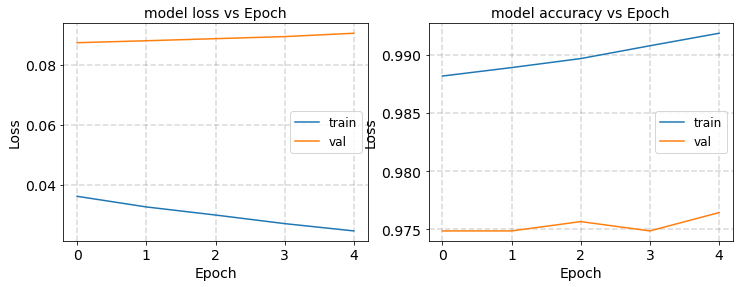

6
Epoch 1/5
1250/1250 - 3s - loss: 0.2204 - accuracy: 0.9424 - val_loss: 0.0712 - val_accuracy: 0.9803
Epoch 2/5
1250/1250 - 3s - loss: 0.0298 - accuracy: 0.9900 - val_loss: 0.0549 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 3s - loss: 0.0185 - accuracy: 0.9946 - val_loss: 0.0519 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 3s - loss: 0.0135 - accuracy: 0.9970 - val_loss: 0.0495 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 3s - loss: 0.0105 - accuracy: 0.9977 - val_loss: 0.0494 - val_accuracy: 0.9866


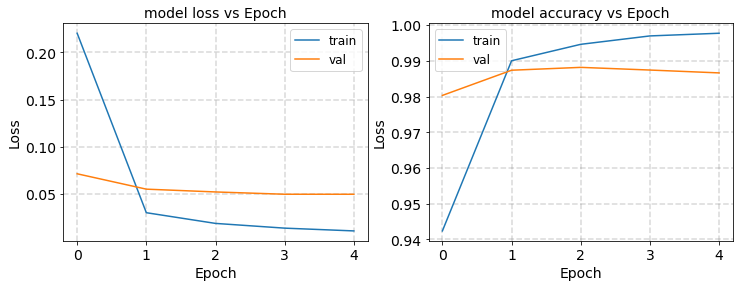

7
Epoch 1/5
1250/1250 - 3s - loss: 0.3787 - accuracy: 0.9412 - val_loss: 0.1121 - val_accuracy: 0.9819
Epoch 2/5
1250/1250 - 3s - loss: 0.0159 - accuracy: 0.9951 - val_loss: 0.0991 - val_accuracy: 0.9827
Epoch 3/5
1250/1250 - 3s - loss: 0.0087 - accuracy: 0.9977 - val_loss: 0.1012 - val_accuracy: 0.9812
Epoch 4/5
1250/1250 - 3s - loss: 0.0050 - accuracy: 0.9991 - val_loss: 0.1002 - val_accuracy: 0.9812
Epoch 5/5
1250/1250 - 3s - loss: 0.0028 - accuracy: 0.9996 - val_loss: 0.1107 - val_accuracy: 0.9812


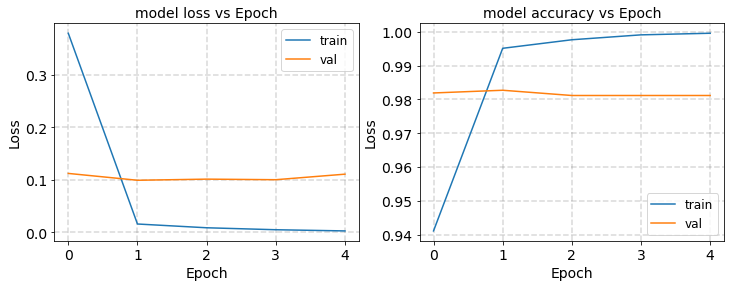

4
Epoch 1/5
1250/1250 - 3s - loss: 0.2332 - accuracy: 0.9453 - val_loss: 0.0920 - val_accuracy: 0.9718
Epoch 2/5
1250/1250 - 3s - loss: 0.0709 - accuracy: 0.9771 - val_loss: 0.0753 - val_accuracy: 0.9781
Epoch 3/5
1250/1250 - 2s - loss: 0.0550 - accuracy: 0.9832 - val_loss: 0.0661 - val_accuracy: 0.9836
Epoch 4/5
1250/1250 - 3s - loss: 0.0461 - accuracy: 0.9868 - val_loss: 0.0633 - val_accuracy: 0.9836
Epoch 5/5
1250/1250 - 3s - loss: 0.0395 - accuracy: 0.9884 - val_loss: 0.0667 - val_accuracy: 0.9851


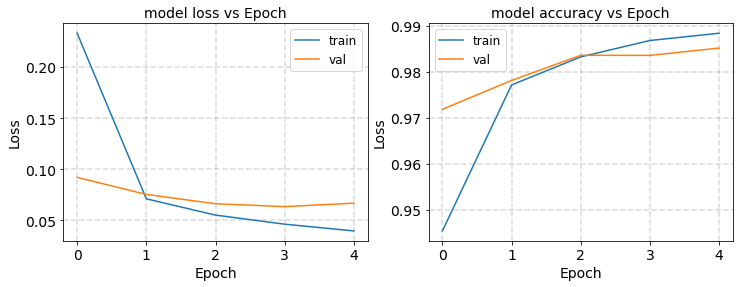

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten  (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense (P (None, 32)                50210     
_________________________________________________________________
prune_low_magnitude_dense_1  (None, 32)                2082      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 132       
Total params: 52,425
Trainable params: 26,308
Non-trainable params: 26,117
_________________________________________________________________
Epoch 1/10
1250/1250 - 2s - loss: 0.7968 - accuracy: 0.8032 - val_loss: 0.2580 - val_accuracy: 0.9398
Epoch 2/10
1250/1250 - 2s - loss: 0.2197 - accuracy: 0.9454 - val_loss: 0.1910 - val_accuracy: 0.9405
Epoch 3/10
1250/1250 - 2s - loss: 0.175

/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spec

run 1
round0 [4 6 2 7]
4
Epoch 1/5
1250/1250 - 3s - loss: 0.1388 - accuracy: 0.9505 - val_loss: 0.0585 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 2s - loss: 0.0431 - accuracy: 0.9865 - val_loss: 0.0503 - val_accuracy: 0.9851
Epoch 3/5
1250/1250 - 2s - loss: 0.0270 - accuracy: 0.9921 - val_loss: 0.0485 - val_accuracy: 0.9851
Epoch 4/5
1250/1250 - 3s - loss: 0.0173 - accuracy: 0.9957 - val_loss: 0.0502 - val_accuracy: 0.9859
Epoch 5/5
1250/1250 - 3s - loss: 0.0107 - accuracy: 0.9981 - val_loss: 0.0463 - val_accuracy: 0.9890


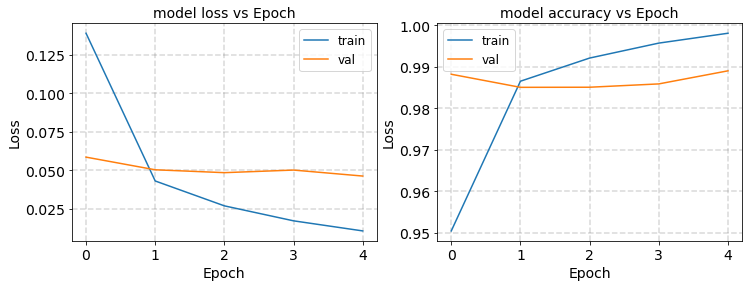

6
Epoch 1/5
1250/1250 - 3s - loss: 0.1206 - accuracy: 0.9658 - val_loss: 0.0460 - val_accuracy: 0.9881
Epoch 2/5
1250/1250 - 3s - loss: 0.0255 - accuracy: 0.9924 - val_loss: 0.0398 - val_accuracy: 0.9881
Epoch 3/5
1250/1250 - 2s - loss: 0.0150 - accuracy: 0.9959 - val_loss: 0.0376 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 2s - loss: 0.0090 - accuracy: 0.9982 - val_loss: 0.0373 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 2s - loss: 0.0056 - accuracy: 0.9991 - val_loss: 0.0364 - val_accuracy: 0.9913


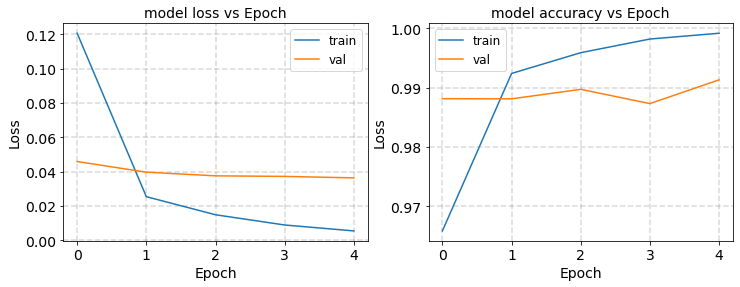

2
Epoch 1/5
1250/1250 - 3s - loss: 0.3280 - accuracy: 0.9104 - val_loss: 0.1428 - val_accuracy: 0.9742
Epoch 2/5
1250/1250 - 3s - loss: 0.0987 - accuracy: 0.9796 - val_loss: 0.0801 - val_accuracy: 0.9750
Epoch 3/5
1250/1250 - 3s - loss: 0.0478 - accuracy: 0.9848 - val_loss: 0.0759 - val_accuracy: 0.9765
Epoch 4/5
1250/1250 - 2s - loss: 0.0369 - accuracy: 0.9882 - val_loss: 0.0731 - val_accuracy: 0.9772
Epoch 5/5
1250/1250 - 3s - loss: 0.0298 - accuracy: 0.9903 - val_loss: 0.0699 - val_accuracy: 0.9772


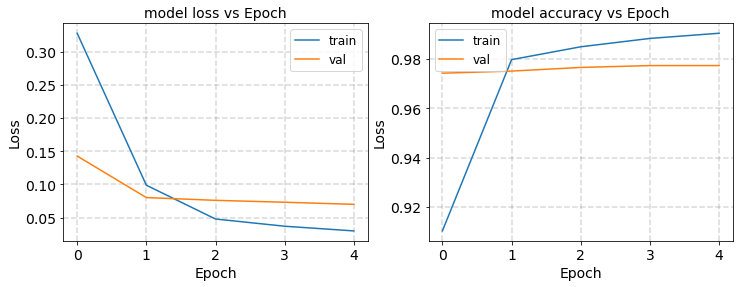

7
Epoch 1/5
1250/1250 - 3s - loss: 0.3050 - accuracy: 0.9119 - val_loss: 0.1223 - val_accuracy: 0.9686
Epoch 2/5
1250/1250 - 2s - loss: 0.0970 - accuracy: 0.9721 - val_loss: 0.0931 - val_accuracy: 0.9764
Epoch 3/5
1250/1250 - 2s - loss: 0.0696 - accuracy: 0.9804 - val_loss: 0.0768 - val_accuracy: 0.9804
Epoch 4/5
1250/1250 - 3s - loss: 0.0547 - accuracy: 0.9836 - val_loss: 0.0694 - val_accuracy: 0.9820
Epoch 5/5
1250/1250 - 2s - loss: 0.0439 - accuracy: 0.9871 - val_loss: 0.0610 - val_accuracy: 0.9827


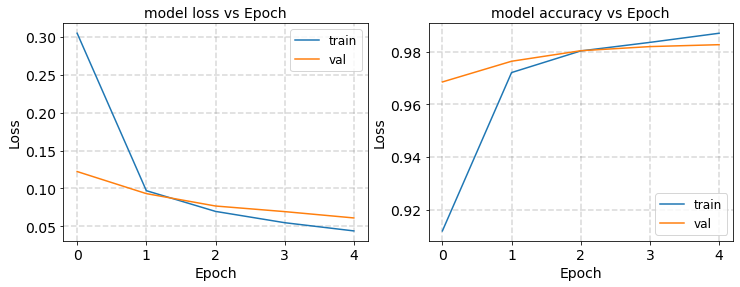

round1 [4 2 6 7]
4
Epoch 1/5
1250/1250 - 3s - loss: 0.5401 - accuracy: 0.8089 - val_loss: 0.1172 - val_accuracy: 0.9647
Epoch 2/5
1250/1250 - 3s - loss: 0.0926 - accuracy: 0.9725 - val_loss: 0.0840 - val_accuracy: 0.9789
Epoch 3/5
1250/1250 - 3s - loss: 0.0710 - accuracy: 0.9798 - val_loss: 0.0703 - val_accuracy: 0.9828
Epoch 4/5
1250/1250 - 3s - loss: 0.0573 - accuracy: 0.9841 - val_loss: 0.0643 - val_accuracy: 0.9851
Epoch 5/5
1250/1250 - 2s - loss: 0.0454 - accuracy: 0.9874 - val_loss: 0.0631 - val_accuracy: 0.9867


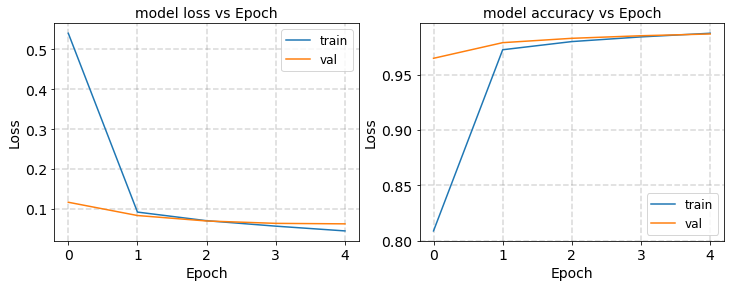

2
Epoch 1/5
1250/1250 - 3s - loss: 0.2819 - accuracy: 0.9193 - val_loss: 0.0859 - val_accuracy: 0.9726
Epoch 2/5
1250/1250 - 2s - loss: 0.0443 - accuracy: 0.9849 - val_loss: 0.0741 - val_accuracy: 0.9788
Epoch 3/5
1250/1250 - 2s - loss: 0.0295 - accuracy: 0.9904 - val_loss: 0.0702 - val_accuracy: 0.9788
Epoch 4/5
1250/1250 - 2s - loss: 0.0219 - accuracy: 0.9938 - val_loss: 0.0698 - val_accuracy: 0.9765
Epoch 5/5
1250/1250 - 2s - loss: 0.0166 - accuracy: 0.9961 - val_loss: 0.0705 - val_accuracy: 0.9789


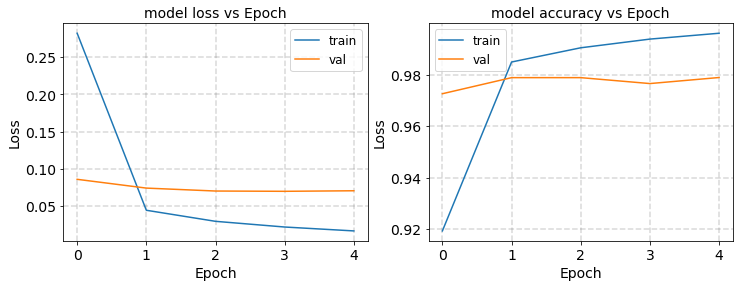

6
Epoch 1/5
1250/1250 - 2s - loss: 0.2512 - accuracy: 0.9258 - val_loss: 0.0713 - val_accuracy: 0.9795
Epoch 2/5
1250/1250 - 2s - loss: 0.0608 - accuracy: 0.9815 - val_loss: 0.0554 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 2s - loss: 0.0382 - accuracy: 0.9893 - val_loss: 0.0470 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 2s - loss: 0.0257 - accuracy: 0.9930 - val_loss: 0.0402 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 2s - loss: 0.0170 - accuracy: 0.9957 - val_loss: 0.0384 - val_accuracy: 0.9858


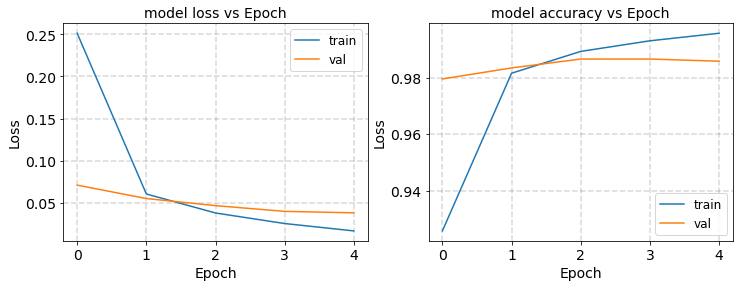

7
Epoch 1/5
1250/1250 - 2s - loss: 0.4158 - accuracy: 0.9158 - val_loss: 0.0900 - val_accuracy: 0.9788
Epoch 2/5
1250/1250 - 2s - loss: 0.0466 - accuracy: 0.9850 - val_loss: 0.0746 - val_accuracy: 0.9788
Epoch 3/5
1250/1250 - 2s - loss: 0.0346 - accuracy: 0.9889 - val_loss: 0.0670 - val_accuracy: 0.9796
Epoch 4/5
1250/1250 - 2s - loss: 0.0278 - accuracy: 0.9911 - val_loss: 0.0641 - val_accuracy: 0.9796
Epoch 5/5
1250/1250 - 2s - loss: 0.0226 - accuracy: 0.9927 - val_loss: 0.0597 - val_accuracy: 0.9796


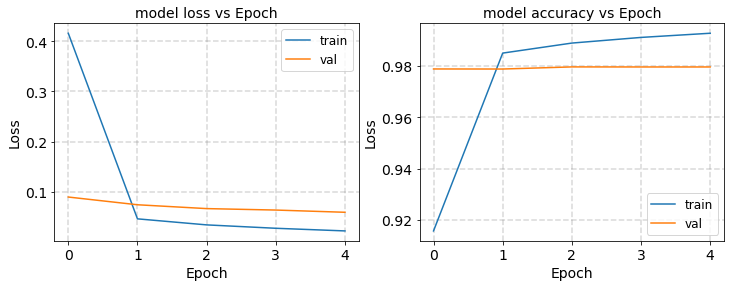

round2 [4 7 6 2]
4
Epoch 1/5
1250/1250 - 3s - loss: 0.3647 - accuracy: 0.8870 - val_loss: 0.1005 - val_accuracy: 0.9733
Epoch 2/5
1250/1250 - 2s - loss: 0.0881 - accuracy: 0.9712 - val_loss: 0.0841 - val_accuracy: 0.9748
Epoch 3/5
1250/1250 - 2s - loss: 0.0734 - accuracy: 0.9767 - val_loss: 0.0761 - val_accuracy: 0.9780
Epoch 4/5
1250/1250 - 2s - loss: 0.0621 - accuracy: 0.9809 - val_loss: 0.0739 - val_accuracy: 0.9812
Epoch 5/5
1250/1250 - 3s - loss: 0.0524 - accuracy: 0.9848 - val_loss: 0.0761 - val_accuracy: 0.9820


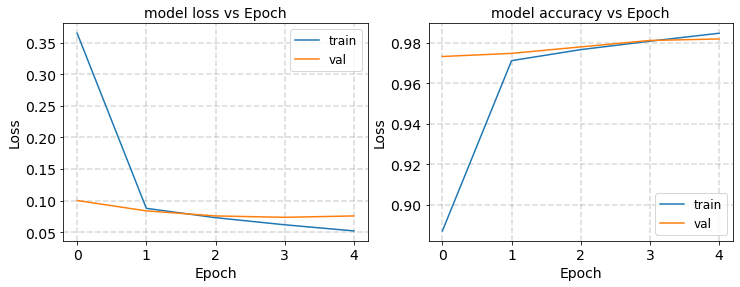

7
Epoch 1/5
1250/1250 - 3s - loss: 0.1992 - accuracy: 0.9468 - val_loss: 0.0902 - val_accuracy: 0.9765
Epoch 2/5
1250/1250 - 2s - loss: 0.0275 - accuracy: 0.9901 - val_loss: 0.0814 - val_accuracy: 0.9780
Epoch 3/5
1250/1250 - 2s - loss: 0.0224 - accuracy: 0.9927 - val_loss: 0.0756 - val_accuracy: 0.9804
Epoch 4/5
1250/1250 - 2s - loss: 0.0187 - accuracy: 0.9942 - val_loss: 0.0703 - val_accuracy: 0.9789
Epoch 5/5
1250/1250 - 2s - loss: 0.0157 - accuracy: 0.9950 - val_loss: 0.0769 - val_accuracy: 0.9781


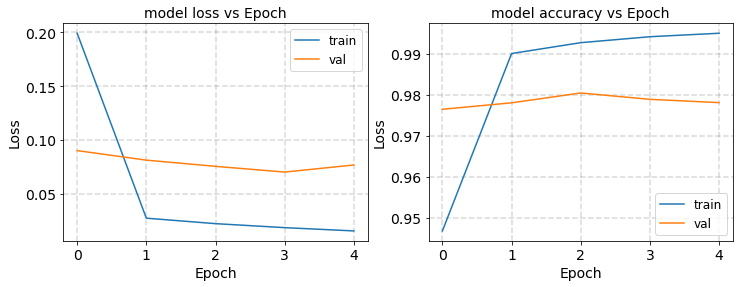

6
Epoch 1/5
1250/1250 - 2s - loss: 0.3393 - accuracy: 0.9278 - val_loss: 0.0637 - val_accuracy: 0.9811
Epoch 2/5
1250/1250 - 2s - loss: 0.0416 - accuracy: 0.9877 - val_loss: 0.0525 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 2s - loss: 0.0294 - accuracy: 0.9917 - val_loss: 0.0481 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 2s - loss: 0.0225 - accuracy: 0.9940 - val_loss: 0.0437 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 2s - loss: 0.0177 - accuracy: 0.9960 - val_loss: 0.0417 - val_accuracy: 0.9881


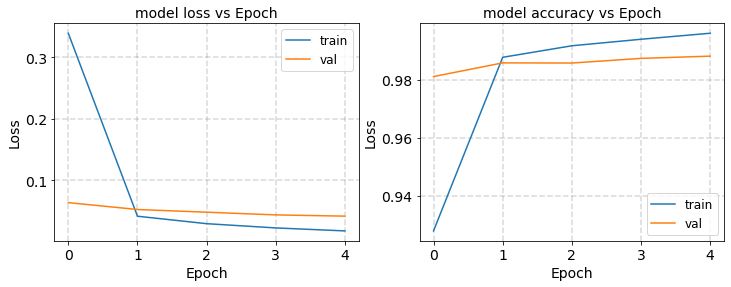

2
Epoch 1/5
1250/1250 - 2s - loss: 0.6583 - accuracy: 0.8212 - val_loss: 0.1284 - val_accuracy: 0.9554
Epoch 2/5
1250/1250 - 2s - loss: 0.0756 - accuracy: 0.9750 - val_loss: 0.0984 - val_accuracy: 0.9718
Epoch 3/5
1250/1250 - 3s - loss: 0.0528 - accuracy: 0.9840 - val_loss: 0.0894 - val_accuracy: 0.9734
Epoch 4/5
1250/1250 - 3s - loss: 0.0404 - accuracy: 0.9879 - val_loss: 0.0863 - val_accuracy: 0.9765
Epoch 5/5
1250/1250 - 3s - loss: 0.0314 - accuracy: 0.9909 - val_loss: 0.0831 - val_accuracy: 0.9765


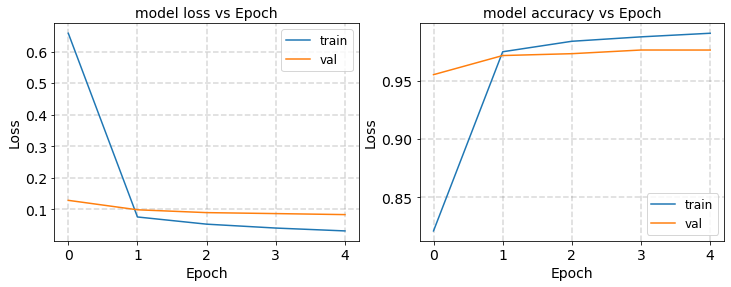

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_4  (None, 32)                50210     
_________________________________________________________________
prune_low_magnitude_dense_5  (None, 32)                2082      
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 132       
Total params: 52,425
Trainable params: 26,308
Non-trainable params: 26,117
_________________________________________________________________
Epoch 1/10
1250/1250 - 2s - loss: 1.0287 - accuracy: 0.6971 - val_loss: 0.4873 - val_accuracy: 0.8600
Epoch 2/10
1250/1250 - 2s - loss: 0.3853 - accuracy: 0.9016 - val_loss: 0.3878 - val_accuracy: 0.8865
Epoch 3/10
1250/1250 - 2s - loss: 0.308

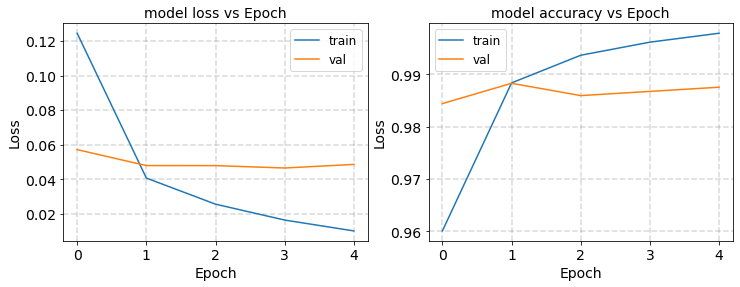

7
Epoch 1/5
1250/1250 - 4s - loss: 0.1151 - accuracy: 0.9684 - val_loss: 0.0638 - val_accuracy: 0.9835
Epoch 2/5
1250/1250 - 3s - loss: 0.0341 - accuracy: 0.9895 - val_loss: 0.0540 - val_accuracy: 0.9859
Epoch 3/5
1250/1250 - 3s - loss: 0.0242 - accuracy: 0.9927 - val_loss: 0.0488 - val_accuracy: 0.9851
Epoch 4/5
1250/1250 - 3s - loss: 0.0174 - accuracy: 0.9948 - val_loss: 0.0445 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 4s - loss: 0.0125 - accuracy: 0.9967 - val_loss: 0.0448 - val_accuracy: 0.9874


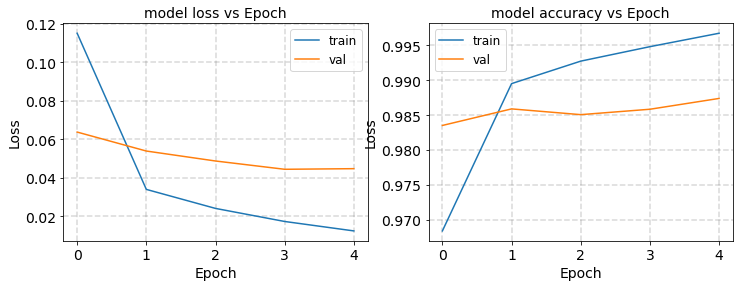

6
Epoch 1/5
1250/1250 - 4s - loss: 0.2440 - accuracy: 0.9441 - val_loss: 0.0964 - val_accuracy: 0.9772
Epoch 2/5
1250/1250 - 4s - loss: 0.0683 - accuracy: 0.9879 - val_loss: 0.0649 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 3s - loss: 0.0401 - accuracy: 0.9926 - val_loss: 0.0535 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 3s - loss: 0.0251 - accuracy: 0.9954 - val_loss: 0.0452 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 3s - loss: 0.0156 - accuracy: 0.9979 - val_loss: 0.0468 - val_accuracy: 0.9874


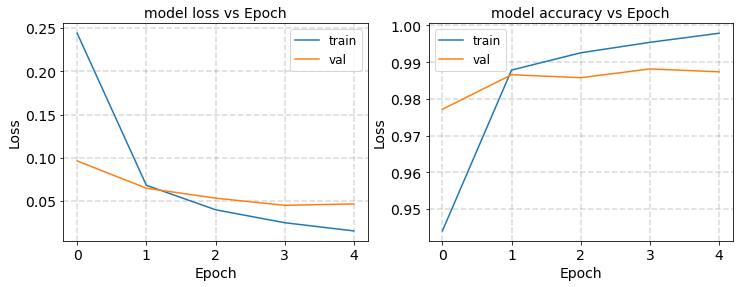

2
Epoch 1/5
1250/1250 - 3s - loss: 0.4654 - accuracy: 0.8573 - val_loss: 0.1398 - val_accuracy: 0.9554
Epoch 2/5
1250/1250 - 3s - loss: 0.0896 - accuracy: 0.9710 - val_loss: 0.0979 - val_accuracy: 0.9679
Epoch 3/5
1250/1250 - 3s - loss: 0.0596 - accuracy: 0.9805 - val_loss: 0.0767 - val_accuracy: 0.9781
Epoch 4/5
1250/1250 - 3s - loss: 0.0436 - accuracy: 0.9863 - val_loss: 0.0653 - val_accuracy: 0.9804
Epoch 5/5
1250/1250 - 3s - loss: 0.0328 - accuracy: 0.9899 - val_loss: 0.0589 - val_accuracy: 0.9836


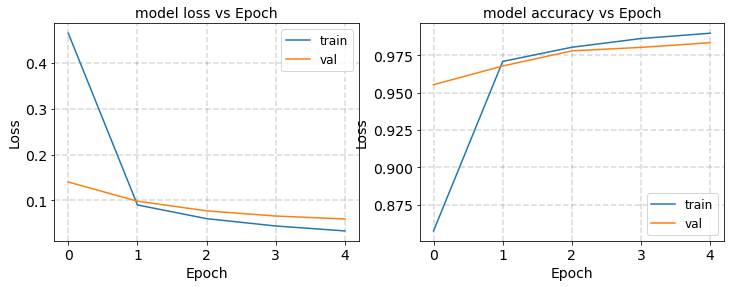

round1 [6 7 2 4]
6
Epoch 1/5
1250/1250 - 3s - loss: 0.1375 - accuracy: 0.9586 - val_loss: 0.0597 - val_accuracy: 0.9819
Epoch 2/5
1250/1250 - 3s - loss: 0.0351 - accuracy: 0.9891 - val_loss: 0.0538 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 3s - loss: 0.0251 - accuracy: 0.9932 - val_loss: 0.0501 - val_accuracy: 0.9843
Epoch 4/5
1250/1250 - 3s - loss: 0.0190 - accuracy: 0.9954 - val_loss: 0.0515 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 3s - loss: 0.0145 - accuracy: 0.9970 - val_loss: 0.0552 - val_accuracy: 0.9858


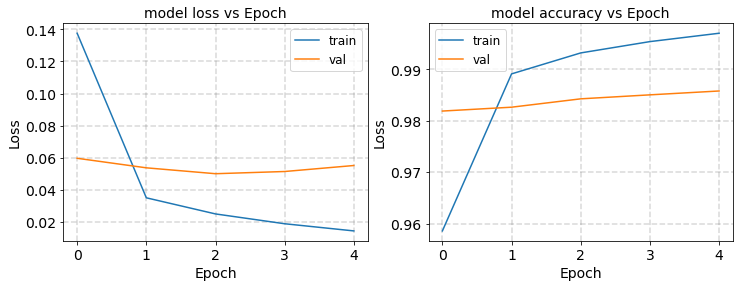

7
Epoch 1/5
1250/1250 - 3s - loss: 0.3321 - accuracy: 0.9304 - val_loss: 0.0853 - val_accuracy: 0.9804
Epoch 2/5
1250/1250 - 3s - loss: 0.0266 - accuracy: 0.9923 - val_loss: 0.0773 - val_accuracy: 0.9811
Epoch 3/5
1250/1250 - 3s - loss: 0.0176 - accuracy: 0.9954 - val_loss: 0.0709 - val_accuracy: 0.9795
Epoch 4/5
1250/1250 - 3s - loss: 0.0123 - accuracy: 0.9970 - val_loss: 0.0665 - val_accuracy: 0.9803
Epoch 5/5
1250/1250 - 3s - loss: 0.0090 - accuracy: 0.9983 - val_loss: 0.0704 - val_accuracy: 0.9803


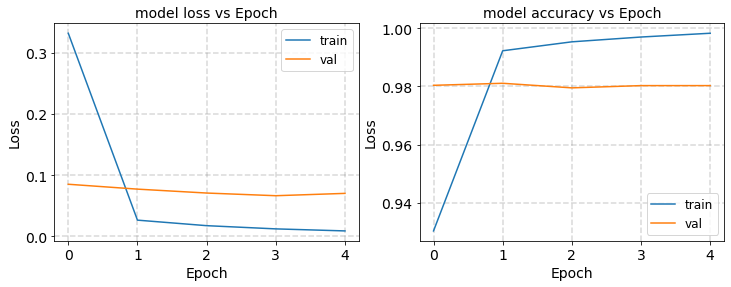

2
Epoch 1/5
1250/1250 - 3s - loss: 0.2203 - accuracy: 0.9532 - val_loss: 0.0780 - val_accuracy: 0.9742
Epoch 2/5
1250/1250 - 3s - loss: 0.0405 - accuracy: 0.9875 - val_loss: 0.0694 - val_accuracy: 0.9742
Epoch 3/5
1250/1250 - 3s - loss: 0.0303 - accuracy: 0.9913 - val_loss: 0.0652 - val_accuracy: 0.9781
Epoch 4/5
1250/1250 - 3s - loss: 0.0237 - accuracy: 0.9933 - val_loss: 0.0647 - val_accuracy: 0.9804
Epoch 5/5
1250/1250 - 3s - loss: 0.0196 - accuracy: 0.9948 - val_loss: 0.0639 - val_accuracy: 0.9812


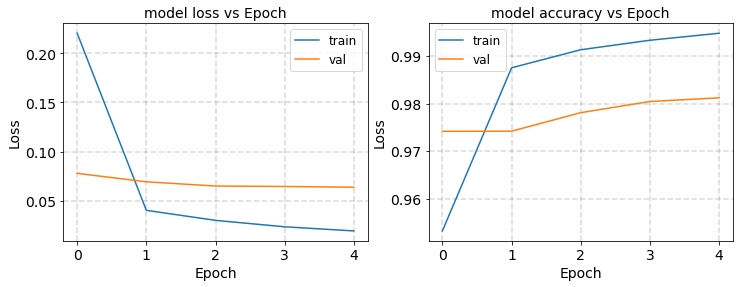

4
Epoch 1/5
1250/1250 - 3s - loss: 0.2867 - accuracy: 0.9069 - val_loss: 0.0979 - val_accuracy: 0.9672
Epoch 2/5
1250/1250 - 3s - loss: 0.0978 - accuracy: 0.9641 - val_loss: 0.0809 - val_accuracy: 0.9750
Epoch 3/5
1250/1250 - 3s - loss: 0.0764 - accuracy: 0.9730 - val_loss: 0.0738 - val_accuracy: 0.9774
Epoch 4/5
1250/1250 - 3s - loss: 0.0657 - accuracy: 0.9772 - val_loss: 0.0750 - val_accuracy: 0.9774
Epoch 5/5
1250/1250 - 3s - loss: 0.0586 - accuracy: 0.9796 - val_loss: 0.0721 - val_accuracy: 0.9789


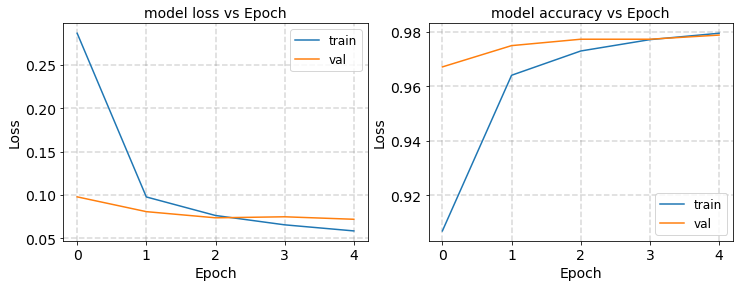

round2 [7 2 4 6]
7
Epoch 1/5
1250/1250 - 3s - loss: 0.1498 - accuracy: 0.9640 - val_loss: 0.0899 - val_accuracy: 0.9804
Epoch 2/5
1250/1250 - 3s - loss: 0.0158 - accuracy: 0.9957 - val_loss: 0.0957 - val_accuracy: 0.9811
Epoch 3/5
1250/1250 - 3s - loss: 0.0109 - accuracy: 0.9972 - val_loss: 0.0911 - val_accuracy: 0.9811
Epoch 4/5
1250/1250 - 3s - loss: 0.0078 - accuracy: 0.9982 - val_loss: 0.0905 - val_accuracy: 0.9811
Epoch 5/5
1250/1250 - 3s - loss: 0.0054 - accuracy: 0.9990 - val_loss: 0.0930 - val_accuracy: 0.9803


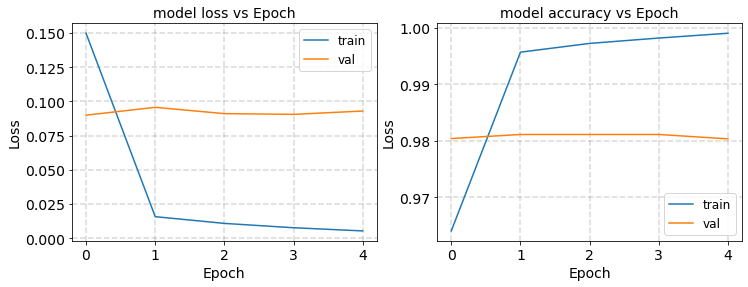

2
Epoch 1/5
1250/1250 - 3s - loss: 0.2232 - accuracy: 0.9602 - val_loss: 0.0850 - val_accuracy: 0.9780
Epoch 2/5
1250/1250 - 3s - loss: 0.0315 - accuracy: 0.9903 - val_loss: 0.0734 - val_accuracy: 0.9780
Epoch 3/5
1250/1250 - 3s - loss: 0.0242 - accuracy: 0.9933 - val_loss: 0.0666 - val_accuracy: 0.9804
Epoch 4/5
1250/1250 - 3s - loss: 0.0200 - accuracy: 0.9954 - val_loss: 0.0671 - val_accuracy: 0.9812
Epoch 5/5
1250/1250 - 3s - loss: 0.0170 - accuracy: 0.9962 - val_loss: 0.0681 - val_accuracy: 0.9788


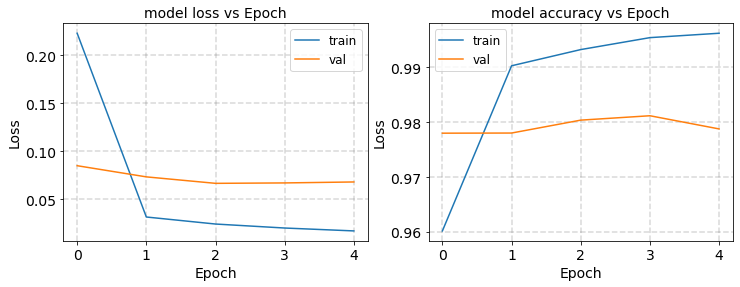

4
Epoch 1/5
1250/1250 - 3s - loss: 0.2463 - accuracy: 0.9245 - val_loss: 0.0820 - val_accuracy: 0.9718
Epoch 2/5
1250/1250 - 3s - loss: 0.0660 - accuracy: 0.9765 - val_loss: 0.0764 - val_accuracy: 0.9742
Epoch 3/5
1250/1250 - 3s - loss: 0.0558 - accuracy: 0.9802 - val_loss: 0.0726 - val_accuracy: 0.9757
Epoch 4/5
1250/1250 - 3s - loss: 0.0498 - accuracy: 0.9823 - val_loss: 0.0678 - val_accuracy: 0.9788
Epoch 5/5
1250/1250 - 4s - loss: 0.0454 - accuracy: 0.9836 - val_loss: 0.0663 - val_accuracy: 0.9773


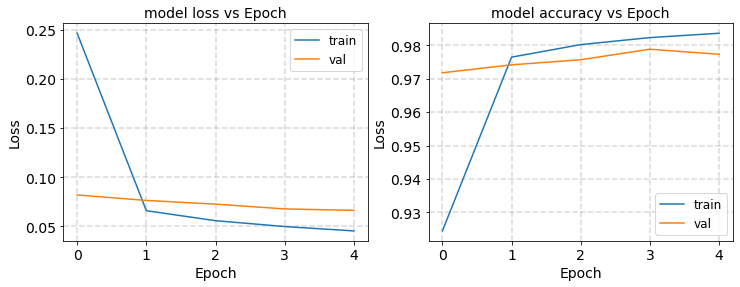

6
Epoch 1/5
1250/1250 - 4s - loss: 0.2514 - accuracy: 0.9286 - val_loss: 0.0656 - val_accuracy: 0.9787
Epoch 2/5
1250/1250 - 3s - loss: 0.0767 - accuracy: 0.9739 - val_loss: 0.0539 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 4s - loss: 0.0610 - accuracy: 0.9793 - val_loss: 0.0482 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 4s - loss: 0.0517 - accuracy: 0.9831 - val_loss: 0.0445 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 4s - loss: 0.0449 - accuracy: 0.9850 - val_loss: 0.0433 - val_accuracy: 0.9850


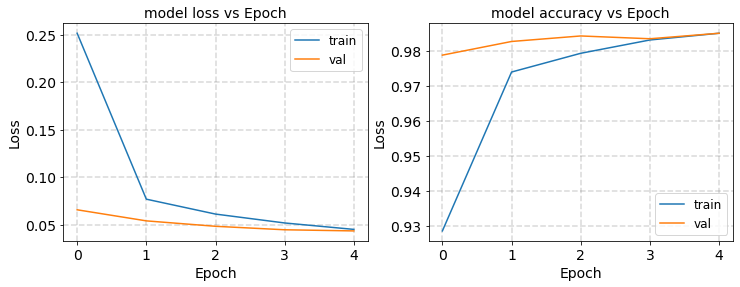

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_8  (None, 32)                50210     
_________________________________________________________________
prune_low_magnitude_dense_9  (None, 32)                2082      
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 132       
Total params: 52,425
Trainable params: 26,308
Non-trainable params: 26,117
_________________________________________________________________
Epoch 1/10
1250/1250 - 2s - loss: 0.6503 - accuracy: 0.8173 - val_loss: 0.2875 - val_accuracy: 0.9365
Epoch 2/10
1250/1250 - 2s - loss: 0.2295 - accuracy: 0.9460 - val_loss: 0.1988 - val_accuracy: 0.9405
Epoch 3/10
1250/1250 - 2s - loss: 0.171

/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spec

run 3
round0 [7 4 6 2]
7
Epoch 1/5
1250/1250 - 3s - loss: 0.1850 - accuracy: 0.9514 - val_loss: 0.1255 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 2s - loss: 0.0797 - accuracy: 0.9915 - val_loss: 0.0831 - val_accuracy: 0.9851
Epoch 3/5
1250/1250 - 2s - loss: 0.0459 - accuracy: 0.9946 - val_loss: 0.0680 - val_accuracy: 0.9867
Epoch 4/5
1250/1250 - 2s - loss: 0.0273 - accuracy: 0.9966 - val_loss: 0.0583 - val_accuracy: 0.9851
Epoch 5/5
1250/1250 - 2s - loss: 0.0170 - accuracy: 0.9981 - val_loss: 0.0586 - val_accuracy: 0.9875


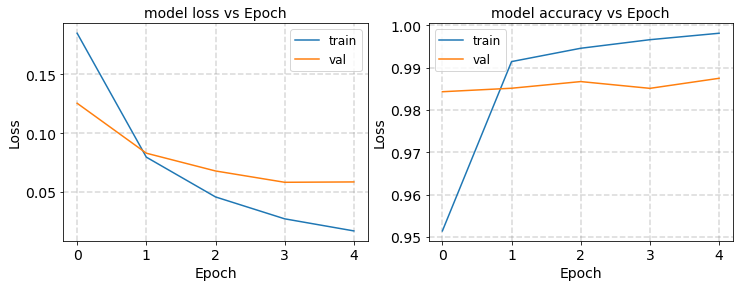

4
Epoch 1/5
1250/1250 - 2s - loss: 0.3159 - accuracy: 0.8968 - val_loss: 0.0680 - val_accuracy: 0.9851
Epoch 2/5
1250/1250 - 2s - loss: 0.0364 - accuracy: 0.9889 - val_loss: 0.0413 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 2s - loss: 0.0195 - accuracy: 0.9951 - val_loss: 0.0350 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 2s - loss: 0.0120 - accuracy: 0.9975 - val_loss: 0.0366 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 2s - loss: 0.0078 - accuracy: 0.9988 - val_loss: 0.0372 - val_accuracy: 0.9914


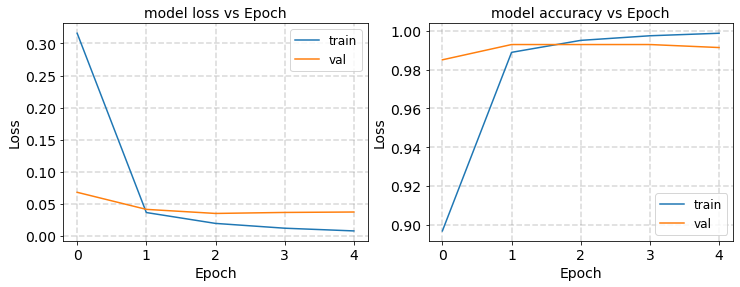

6
Epoch 1/5
1250/1250 - 2s - loss: 0.1558 - accuracy: 0.9510 - val_loss: 0.0559 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 2s - loss: 0.0283 - accuracy: 0.9912 - val_loss: 0.0464 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 2s - loss: 0.0157 - accuracy: 0.9957 - val_loss: 0.0453 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 2s - loss: 0.0096 - accuracy: 0.9977 - val_loss: 0.0473 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 2s - loss: 0.0063 - accuracy: 0.9986 - val_loss: 0.0490 - val_accuracy: 0.9882


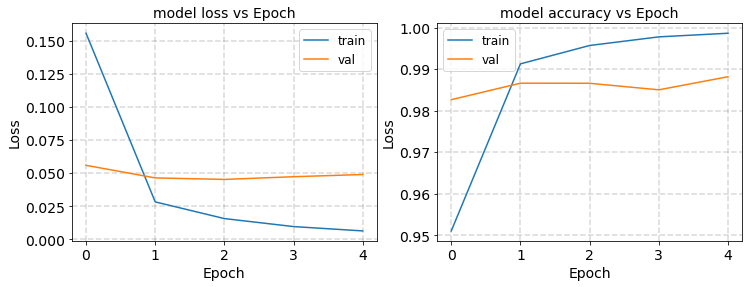

2
Epoch 1/5
1250/1250 - 2s - loss: 0.2030 - accuracy: 0.9447 - val_loss: 0.0980 - val_accuracy: 0.9694
Epoch 2/5
1250/1250 - 2s - loss: 0.0705 - accuracy: 0.9797 - val_loss: 0.0819 - val_accuracy: 0.9717
Epoch 3/5
1250/1250 - 2s - loss: 0.0548 - accuracy: 0.9846 - val_loss: 0.0713 - val_accuracy: 0.9788
Epoch 4/5
1250/1250 - 2s - loss: 0.0447 - accuracy: 0.9871 - val_loss: 0.0655 - val_accuracy: 0.9796
Epoch 5/5
1250/1250 - 2s - loss: 0.0363 - accuracy: 0.9897 - val_loss: 0.0607 - val_accuracy: 0.9819


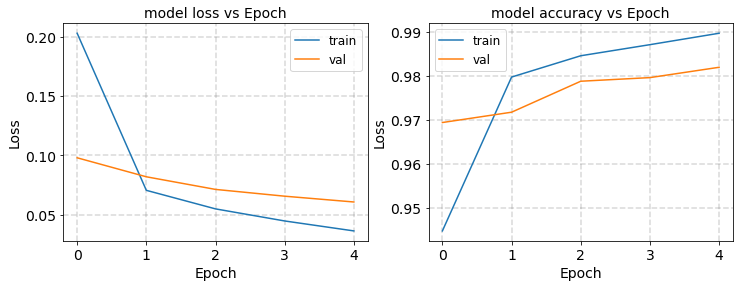

round1 [6 2 4 7]
6
Epoch 1/5
1250/1250 - 2s - loss: 0.1008 - accuracy: 0.9728 - val_loss: 0.0475 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 2s - loss: 0.0170 - accuracy: 0.9965 - val_loss: 0.0426 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 2s - loss: 0.0116 - accuracy: 0.9977 - val_loss: 0.0377 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 2s - loss: 0.0078 - accuracy: 0.9986 - val_loss: 0.0377 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 2s - loss: 0.0053 - accuracy: 0.9992 - val_loss: 0.0393 - val_accuracy: 0.9905


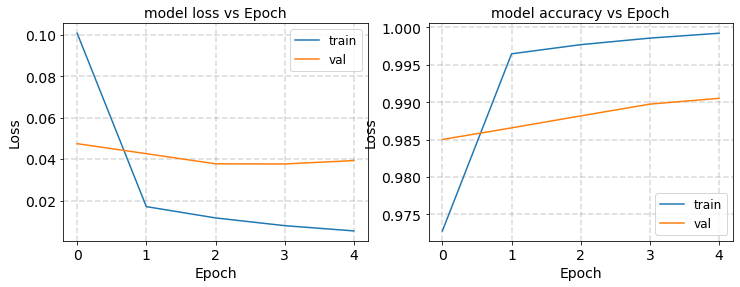

2
Epoch 1/5
1250/1250 - 2s - loss: 0.1158 - accuracy: 0.9777 - val_loss: 0.0694 - val_accuracy: 0.9804
Epoch 2/5
1250/1250 - 2s - loss: 0.0307 - accuracy: 0.9910 - val_loss: 0.0598 - val_accuracy: 0.9827
Epoch 3/5
1250/1250 - 2s - loss: 0.0249 - accuracy: 0.9933 - val_loss: 0.0567 - val_accuracy: 0.9828
Epoch 4/5
1250/1250 - 3s - loss: 0.0205 - accuracy: 0.9946 - val_loss: 0.0533 - val_accuracy: 0.9836
Epoch 5/5
1250/1250 - 3s - loss: 0.0172 - accuracy: 0.9961 - val_loss: 0.0518 - val_accuracy: 0.9844


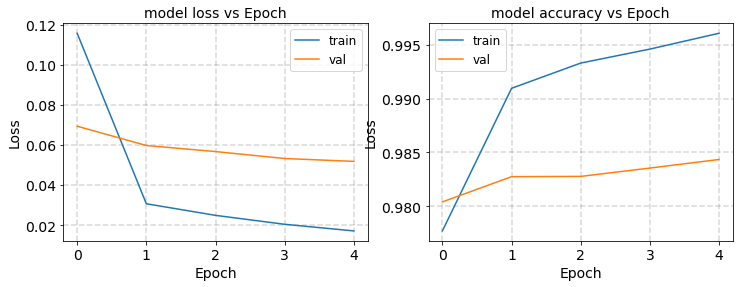

4
Epoch 1/5
1250/1250 - 3s - loss: 0.3706 - accuracy: 0.8971 - val_loss: 0.0771 - val_accuracy: 0.9734
Epoch 2/5
1250/1250 - 2s - loss: 0.0750 - accuracy: 0.9740 - val_loss: 0.0629 - val_accuracy: 0.9797
Epoch 3/5
1250/1250 - 3s - loss: 0.0552 - accuracy: 0.9819 - val_loss: 0.0577 - val_accuracy: 0.9797
Epoch 4/5
1250/1250 - 3s - loss: 0.0433 - accuracy: 0.9867 - val_loss: 0.0578 - val_accuracy: 0.9797
Epoch 5/5
1250/1250 - 3s - loss: 0.0357 - accuracy: 0.9894 - val_loss: 0.0579 - val_accuracy: 0.9836


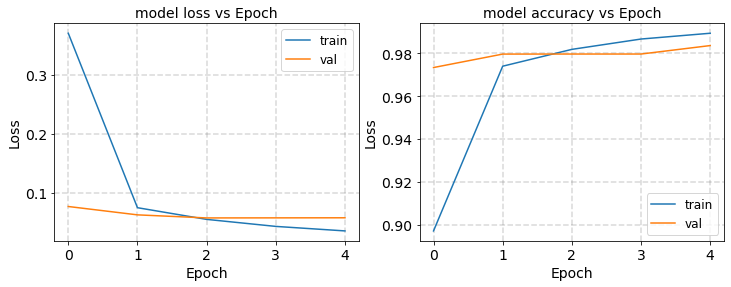

7
Epoch 1/5
1250/1250 - 3s - loss: 0.2271 - accuracy: 0.9424 - val_loss: 0.0723 - val_accuracy: 0.9812
Epoch 2/5
1250/1250 - 3s - loss: 0.0391 - accuracy: 0.9875 - val_loss: 0.0591 - val_accuracy: 0.9851
Epoch 3/5
1250/1250 - 3s - loss: 0.0283 - accuracy: 0.9920 - val_loss: 0.0587 - val_accuracy: 0.9843
Epoch 4/5
1250/1250 - 2s - loss: 0.0222 - accuracy: 0.9943 - val_loss: 0.0559 - val_accuracy: 0.9851
Epoch 5/5
1250/1250 - 3s - loss: 0.0178 - accuracy: 0.9955 - val_loss: 0.0533 - val_accuracy: 0.9859


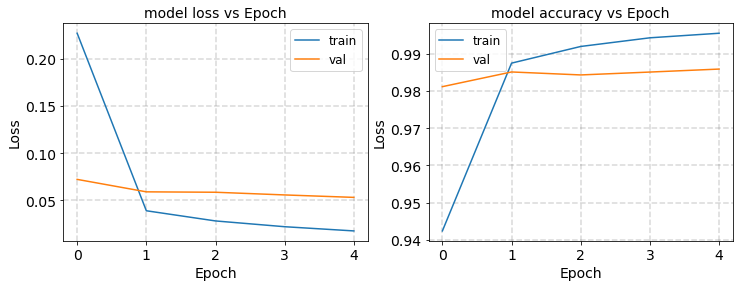

round2 [7 4 2 6]
7
Epoch 1/5
1250/1250 - 3s - loss: 0.0144 - accuracy: 0.9966 - val_loss: 0.0560 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 0.0119 - accuracy: 0.9973 - val_loss: 0.0564 - val_accuracy: 0.9867
Epoch 3/5
1250/1250 - 2s - loss: 0.0098 - accuracy: 0.9977 - val_loss: 0.0608 - val_accuracy: 0.9867
Epoch 4/5
1250/1250 - 2s - loss: 0.0083 - accuracy: 0.9980 - val_loss: 0.0678 - val_accuracy: 0.9851
Epoch 5/5
1250/1250 - 2s - loss: 0.0063 - accuracy: 0.9986 - val_loss: 0.0685 - val_accuracy: 0.9851


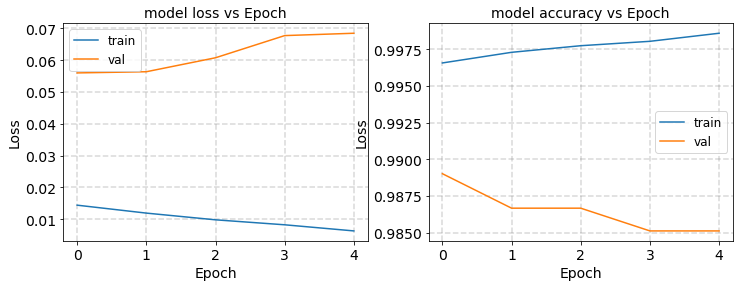

4
Epoch 1/5
1250/1250 - 2s - loss: 0.2223 - accuracy: 0.9476 - val_loss: 0.0904 - val_accuracy: 0.9718
Epoch 2/5
1250/1250 - 2s - loss: 0.0556 - accuracy: 0.9815 - val_loss: 0.0766 - val_accuracy: 0.9789
Epoch 3/5
1250/1250 - 2s - loss: 0.0437 - accuracy: 0.9876 - val_loss: 0.0698 - val_accuracy: 0.9797
Epoch 4/5
1250/1250 - 2s - loss: 0.0376 - accuracy: 0.9890 - val_loss: 0.0654 - val_accuracy: 0.9805
Epoch 5/5
1250/1250 - 2s - loss: 0.0333 - accuracy: 0.9904 - val_loss: 0.0669 - val_accuracy: 0.9805


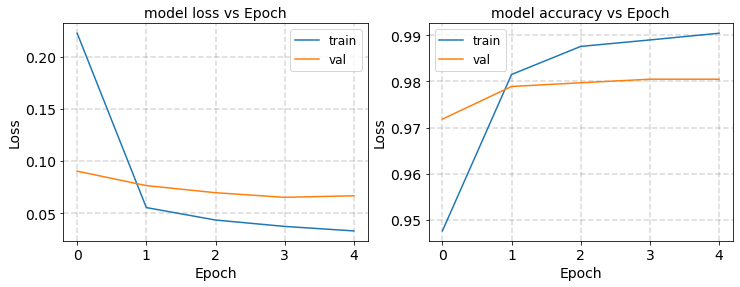

2
Epoch 1/5
1250/1250 - 2s - loss: 0.6478 - accuracy: 0.7767 - val_loss: 0.1438 - val_accuracy: 0.9632
Epoch 2/5
1250/1250 - 2s - loss: 0.1146 - accuracy: 0.9693 - val_loss: 0.0895 - val_accuracy: 0.9756
Epoch 3/5
1250/1250 - 2s - loss: 0.0746 - accuracy: 0.9788 - val_loss: 0.0794 - val_accuracy: 0.9796
Epoch 4/5
1250/1250 - 2s - loss: 0.0567 - accuracy: 0.9834 - val_loss: 0.0770 - val_accuracy: 0.9787
Epoch 5/5
1250/1250 - 2s - loss: 0.0459 - accuracy: 0.9876 - val_loss: 0.0787 - val_accuracy: 0.9788


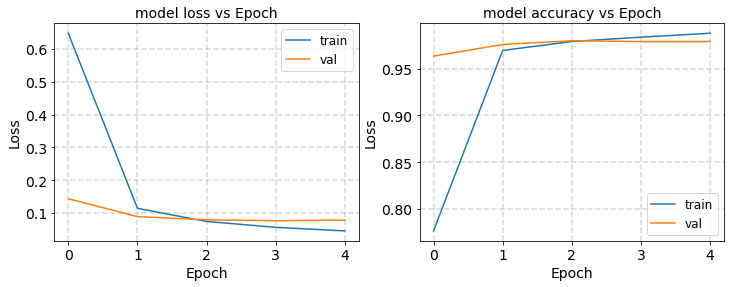

6
Epoch 1/5
1250/1250 - 2s - loss: 0.2887 - accuracy: 0.9145 - val_loss: 0.0951 - val_accuracy: 0.9717
Epoch 2/5
1250/1250 - 2s - loss: 0.0563 - accuracy: 0.9819 - val_loss: 0.0800 - val_accuracy: 0.9787
Epoch 3/5
1250/1250 - 2s - loss: 0.0373 - accuracy: 0.9884 - val_loss: 0.0682 - val_accuracy: 0.9795
Epoch 4/5
1250/1250 - 2s - loss: 0.0222 - accuracy: 0.9926 - val_loss: 0.0627 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 2s - loss: 0.0135 - accuracy: 0.9955 - val_loss: 0.0551 - val_accuracy: 0.9826


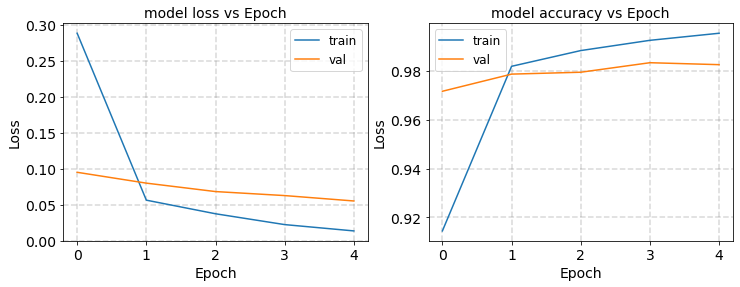

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_12 (None, 32)                50210     
_________________________________________________________________
prune_low_magnitude_dense_13 (None, 32)                2082      
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 132       
Total params: 52,425
Trainable params: 26,308
Non-trainable params: 26,117
_________________________________________________________________
Epoch 1/10
1250/1250 - 2s - loss: 0.6395 - accuracy: 0.8338 - val_loss: 0.2323 - val_accuracy: 0.9435
Epoch 2/10
1250/1250 - 2s - loss: 0.1838 - accuracy: 0.9509 - val_loss: 0.1902 - val_accuracy: 0.9427
Epoch 3/10
1250/1250 - 2s - loss: 0.149

/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spec

run 4
round0 [4 2 6 7]
4
Epoch 1/5
1250/1250 - 2s - loss: 0.1262 - accuracy: 0.9521 - val_loss: 0.0607 - val_accuracy: 0.9867
Epoch 2/5
1250/1250 - 2s - loss: 0.0414 - accuracy: 0.9875 - val_loss: 0.0535 - val_accuracy: 0.9859
Epoch 3/5
1250/1250 - 2s - loss: 0.0237 - accuracy: 0.9932 - val_loss: 0.0467 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 2s - loss: 0.0132 - accuracy: 0.9966 - val_loss: 0.0456 - val_accuracy: 0.9883
Epoch 5/5
1250/1250 - 2s - loss: 0.0075 - accuracy: 0.9990 - val_loss: 0.0479 - val_accuracy: 0.9898


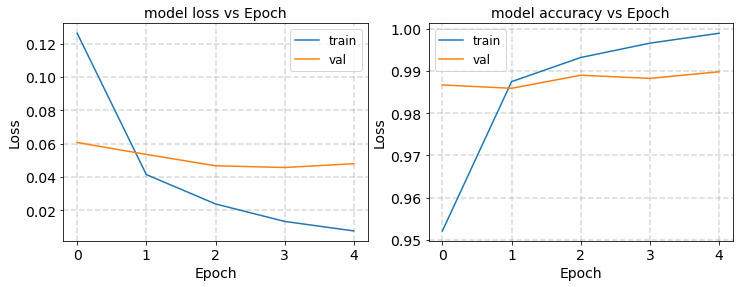

2
Epoch 1/5
1250/1250 - 2s - loss: 0.1938 - accuracy: 0.9471 - val_loss: 0.0710 - val_accuracy: 0.9741
Epoch 2/5
1250/1250 - 2s - loss: 0.0533 - accuracy: 0.9838 - val_loss: 0.0654 - val_accuracy: 0.9820
Epoch 3/5
1250/1250 - 2s - loss: 0.0358 - accuracy: 0.9897 - val_loss: 0.0630 - val_accuracy: 0.9827
Epoch 4/5
1250/1250 - 2s - loss: 0.0245 - accuracy: 0.9929 - val_loss: 0.0574 - val_accuracy: 0.9859
Epoch 5/5
1250/1250 - 2s - loss: 0.0168 - accuracy: 0.9958 - val_loss: 0.0562 - val_accuracy: 0.9875


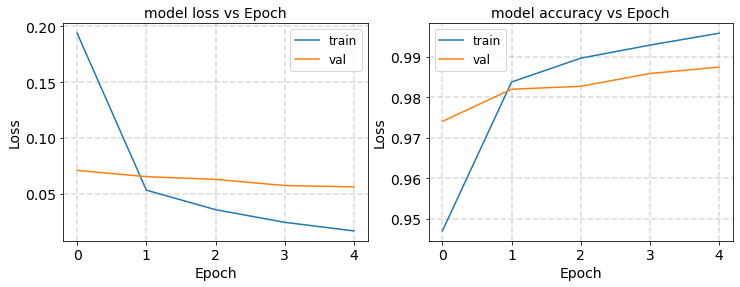

6
Epoch 1/5
1250/1250 - 2s - loss: 0.1611 - accuracy: 0.9562 - val_loss: 0.0435 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 2s - loss: 0.0281 - accuracy: 0.9910 - val_loss: 0.0328 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 3s - loss: 0.0160 - accuracy: 0.9951 - val_loss: 0.0308 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 3s - loss: 0.0091 - accuracy: 0.9976 - val_loss: 0.0294 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 3s - loss: 0.0046 - accuracy: 0.9991 - val_loss: 0.0290 - val_accuracy: 0.9913


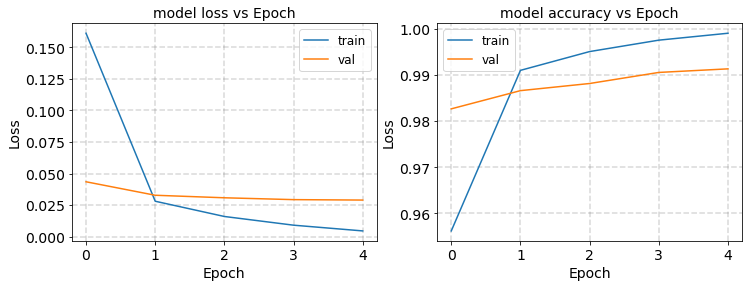

7
Epoch 1/5
1250/1250 - 3s - loss: 0.2657 - accuracy: 0.9331 - val_loss: 0.0854 - val_accuracy: 0.9772
Epoch 2/5
1250/1250 - 3s - loss: 0.0579 - accuracy: 0.9791 - val_loss: 0.0712 - val_accuracy: 0.9811
Epoch 3/5
1250/1250 - 2s - loss: 0.0446 - accuracy: 0.9834 - val_loss: 0.0702 - val_accuracy: 0.9803
Epoch 4/5
1250/1250 - 2s - loss: 0.0366 - accuracy: 0.9870 - val_loss: 0.0643 - val_accuracy: 0.9804
Epoch 5/5
1250/1250 - 2s - loss: 0.0300 - accuracy: 0.9894 - val_loss: 0.0583 - val_accuracy: 0.9787


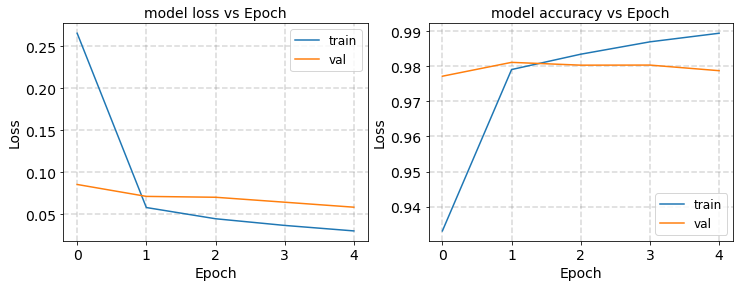

round1 [2 6 7 4]
2
Epoch 1/5
1250/1250 - 2s - loss: 0.2440 - accuracy: 0.9470 - val_loss: 0.0672 - val_accuracy: 0.9805
Epoch 2/5
1250/1250 - 2s - loss: 0.0325 - accuracy: 0.9890 - val_loss: 0.0591 - val_accuracy: 0.9828
Epoch 3/5
1250/1250 - 2s - loss: 0.0215 - accuracy: 0.9934 - val_loss: 0.0568 - val_accuracy: 0.9867
Epoch 4/5
1250/1250 - 2s - loss: 0.0153 - accuracy: 0.9955 - val_loss: 0.0614 - val_accuracy: 0.9867
Epoch 5/5
1250/1250 - 2s - loss: 0.0106 - accuracy: 0.9969 - val_loss: 0.0654 - val_accuracy: 0.9859


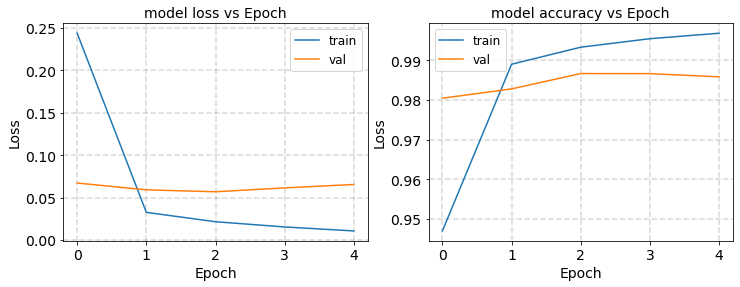

6
Epoch 1/5
1250/1250 - 2s - loss: 0.1737 - accuracy: 0.9419 - val_loss: 0.0291 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 2s - loss: 0.0075 - accuracy: 0.9978 - val_loss: 0.0251 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 2s - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0273 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 2s - loss: 0.0016 - accuracy: 0.9999 - val_loss: 0.0277 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 2s - loss: 8.0330e-04 - accuracy: 1.0000 - val_loss: 0.0311 - val_accuracy: 0.9913


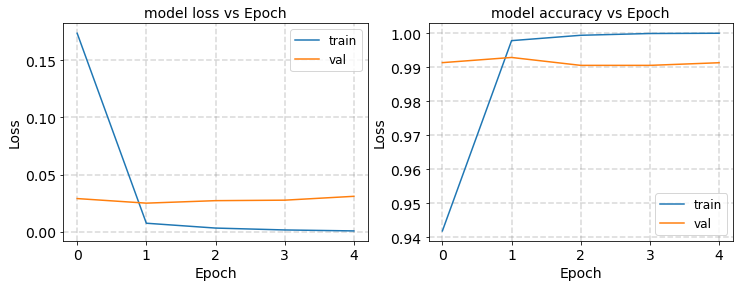

7
Epoch 1/5
1250/1250 - 2s - loss: 0.3048 - accuracy: 0.9397 - val_loss: 0.1094 - val_accuracy: 0.9717
Epoch 2/5
1250/1250 - 2s - loss: 0.0705 - accuracy: 0.9787 - val_loss: 0.0798 - val_accuracy: 0.9764
Epoch 3/5
1250/1250 - 2s - loss: 0.0382 - accuracy: 0.9869 - val_loss: 0.0609 - val_accuracy: 0.9835
Epoch 4/5
1250/1250 - 2s - loss: 0.0265 - accuracy: 0.9908 - val_loss: 0.0591 - val_accuracy: 0.9843
Epoch 5/5
1250/1250 - 2s - loss: 0.0216 - accuracy: 0.9928 - val_loss: 0.0594 - val_accuracy: 0.9835


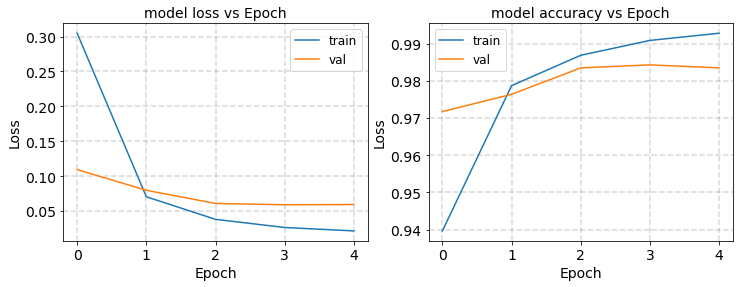

4
Epoch 1/5
1250/1250 - 3s - loss: 0.2157 - accuracy: 0.9420 - val_loss: 0.1063 - val_accuracy: 0.9717
Epoch 2/5
1250/1250 - 3s - loss: 0.0542 - accuracy: 0.9847 - val_loss: 0.0874 - val_accuracy: 0.9788
Epoch 3/5
1250/1250 - 3s - loss: 0.0395 - accuracy: 0.9891 - val_loss: 0.0830 - val_accuracy: 0.9804
Epoch 4/5
1250/1250 - 3s - loss: 0.0309 - accuracy: 0.9918 - val_loss: 0.0884 - val_accuracy: 0.9812
Epoch 5/5
1250/1250 - 3s - loss: 0.0248 - accuracy: 0.9938 - val_loss: 0.0900 - val_accuracy: 0.9835


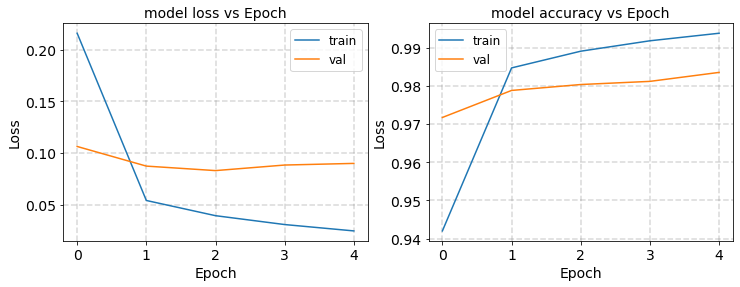

round2 [7 6 4 2]
7
Epoch 1/5
1250/1250 - 3s - loss: 0.1400 - accuracy: 0.9681 - val_loss: 0.0811 - val_accuracy: 0.9718
Epoch 2/5
1250/1250 - 3s - loss: 0.0376 - accuracy: 0.9881 - val_loss: 0.0659 - val_accuracy: 0.9796
Epoch 3/5
1250/1250 - 3s - loss: 0.0234 - accuracy: 0.9916 - val_loss: 0.0565 - val_accuracy: 0.9804
Epoch 4/5
1250/1250 - 3s - loss: 0.0182 - accuracy: 0.9940 - val_loss: 0.0568 - val_accuracy: 0.9787
Epoch 5/5
1250/1250 - 3s - loss: 0.0152 - accuracy: 0.9953 - val_loss: 0.0563 - val_accuracy: 0.9780


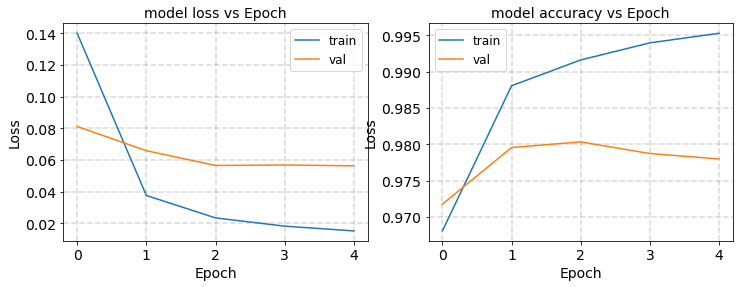

6
Epoch 1/5
1250/1250 - 3s - loss: 0.2917 - accuracy: 0.9517 - val_loss: 0.0449 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 2s - loss: 0.0135 - accuracy: 0.9959 - val_loss: 0.0423 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 3s - loss: 0.0062 - accuracy: 0.9982 - val_loss: 0.0412 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0423 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.0438 - val_accuracy: 0.9913


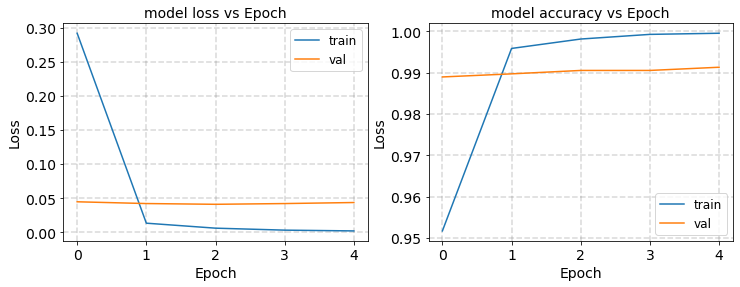

4
Epoch 1/5
1250/1250 - 3s - loss: 0.2305 - accuracy: 0.9485 - val_loss: 0.0963 - val_accuracy: 0.9781
Epoch 2/5
1250/1250 - 3s - loss: 0.0473 - accuracy: 0.9863 - val_loss: 0.0872 - val_accuracy: 0.9797
Epoch 3/5
1250/1250 - 3s - loss: 0.0351 - accuracy: 0.9912 - val_loss: 0.0886 - val_accuracy: 0.9789
Epoch 4/5
1250/1250 - 3s - loss: 0.0275 - accuracy: 0.9933 - val_loss: 0.0892 - val_accuracy: 0.9812
Epoch 5/5
1250/1250 - 3s - loss: 0.0217 - accuracy: 0.9944 - val_loss: 0.0897 - val_accuracy: 0.9812


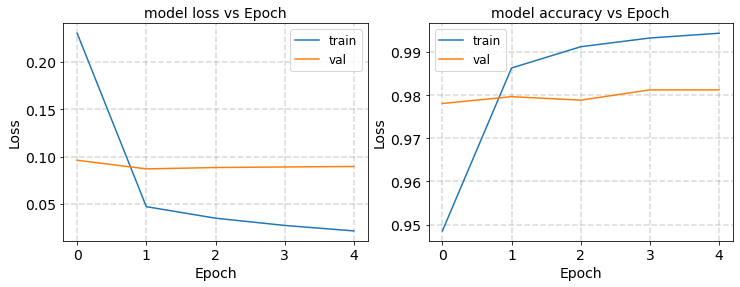

2
Epoch 1/5
1250/1250 - 3s - loss: 0.3851 - accuracy: 0.8996 - val_loss: 0.1325 - val_accuracy: 0.9672
Epoch 2/5
1250/1250 - 3s - loss: 0.0538 - accuracy: 0.9841 - val_loss: 0.1105 - val_accuracy: 0.9734
Epoch 3/5
1250/1250 - 2s - loss: 0.0370 - accuracy: 0.9894 - val_loss: 0.0975 - val_accuracy: 0.9789
Epoch 4/5
1250/1250 - 2s - loss: 0.0285 - accuracy: 0.9921 - val_loss: 0.0935 - val_accuracy: 0.9789
Epoch 5/5
1250/1250 - 2s - loss: 0.0219 - accuracy: 0.9944 - val_loss: 0.0898 - val_accuracy: 0.9781


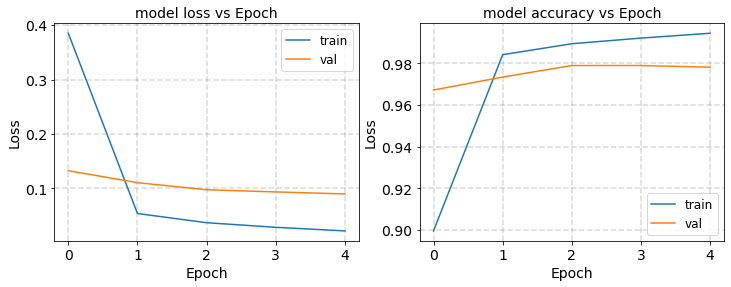

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_16 (None, 32)                50210     
_________________________________________________________________
prune_low_magnitude_dense_17 (None, 32)                2082      
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 132       
Total params: 52,425
Trainable params: 26,308
Non-trainable params: 26,117
_________________________________________________________________
Epoch 1/10
1250/1250 - 2s - loss: 0.5252 - accuracy: 0.8499 - val_loss: 0.2168 - val_accuracy: 0.9412
Epoch 2/10
1250/1250 - 1s - loss: 0.1755 - accuracy: 0.9533 - val_loss: 0.1684 - val_accuracy: 0.9459
Epoch 3/10
1250/1250 - 1s - loss: 0.137

/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spec

run 5
round0 [7 2 6 4]
7
Epoch 1/5
1250/1250 - 4s - loss: 0.0934 - accuracy: 0.9739 - val_loss: 0.0515 - val_accuracy: 0.9851
Epoch 2/5
1250/1250 - 3s - loss: 0.0241 - accuracy: 0.9934 - val_loss: 0.0415 - val_accuracy: 0.9883
Epoch 3/5
1250/1250 - 3s - loss: 0.0142 - accuracy: 0.9962 - val_loss: 0.0348 - val_accuracy: 0.9883
Epoch 4/5
1250/1250 - 3s - loss: 0.0074 - accuracy: 0.9983 - val_loss: 0.0363 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0415 - val_accuracy: 0.9898


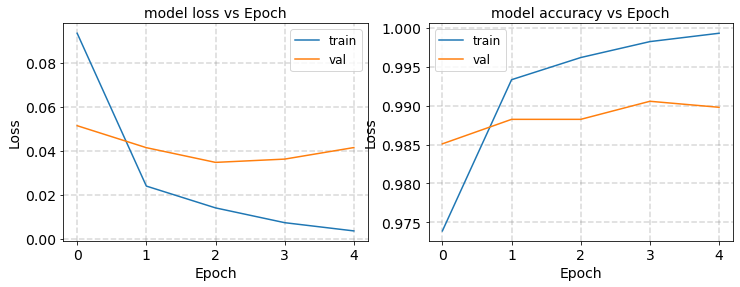

2
Epoch 1/5
1250/1250 - 3s - loss: 0.2627 - accuracy: 0.9423 - val_loss: 0.1196 - val_accuracy: 0.9804
Epoch 2/5
1250/1250 - 3s - loss: 0.0838 - accuracy: 0.9848 - val_loss: 0.0782 - val_accuracy: 0.9835
Epoch 3/5
1250/1250 - 3s - loss: 0.0519 - accuracy: 0.9901 - val_loss: 0.0615 - val_accuracy: 0.9827
Epoch 4/5
1250/1250 - 3s - loss: 0.0346 - accuracy: 0.9941 - val_loss: 0.0508 - val_accuracy: 0.9875
Epoch 5/5
1250/1250 - 3s - loss: 0.0235 - accuracy: 0.9961 - val_loss: 0.0458 - val_accuracy: 0.9875


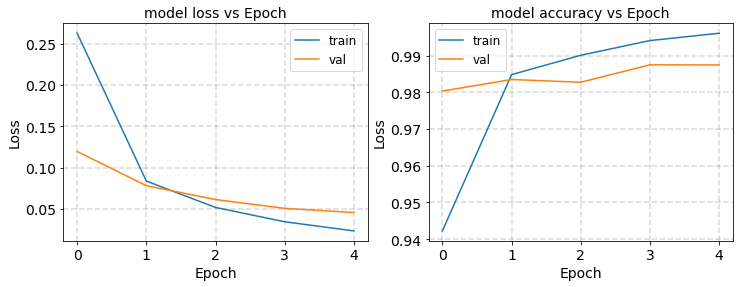

6
Epoch 1/5
1250/1250 - 3s - loss: 0.1544 - accuracy: 0.9507 - val_loss: 0.0480 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 3s - loss: 0.0377 - accuracy: 0.9874 - val_loss: 0.0433 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 3s - loss: 0.0282 - accuracy: 0.9916 - val_loss: 0.0417 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 3s - loss: 0.0220 - accuracy: 0.9940 - val_loss: 0.0416 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 3s - loss: 0.0165 - accuracy: 0.9963 - val_loss: 0.0398 - val_accuracy: 0.9873


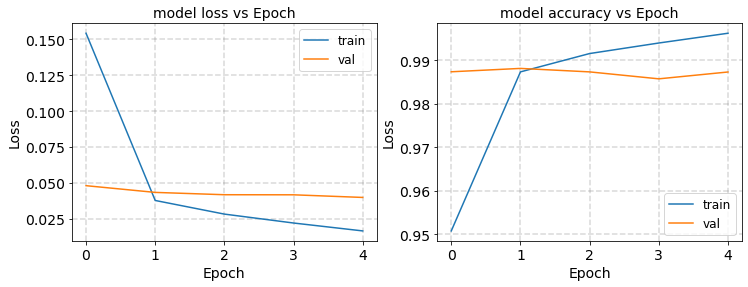

4
Epoch 1/5
1250/1250 - 3s - loss: 0.2866 - accuracy: 0.9190 - val_loss: 0.0806 - val_accuracy: 0.9742
Epoch 2/5
1250/1250 - 3s - loss: 0.0648 - accuracy: 0.9803 - val_loss: 0.0594 - val_accuracy: 0.9805
Epoch 3/5
1250/1250 - 2s - loss: 0.0498 - accuracy: 0.9852 - val_loss: 0.0535 - val_accuracy: 0.9852
Epoch 4/5
1250/1250 - 3s - loss: 0.0414 - accuracy: 0.9879 - val_loss: 0.0525 - val_accuracy: 0.9868
Epoch 5/5
1250/1250 - 3s - loss: 0.0354 - accuracy: 0.9892 - val_loss: 0.0508 - val_accuracy: 0.9852


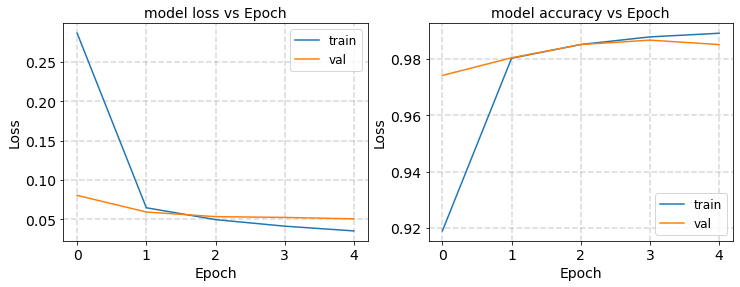

round1 [6 2 4 7]
6
Epoch 1/5
1250/1250 - 3s - loss: 0.1145 - accuracy: 0.9682 - val_loss: 0.0318 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 3s - loss: 0.0159 - accuracy: 0.9962 - val_loss: 0.0270 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 3s - loss: 0.0099 - accuracy: 0.9985 - val_loss: 0.0236 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 2s - loss: 0.0069 - accuracy: 0.9992 - val_loss: 0.0232 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 3s - loss: 0.0049 - accuracy: 0.9994 - val_loss: 0.0249 - val_accuracy: 0.9936


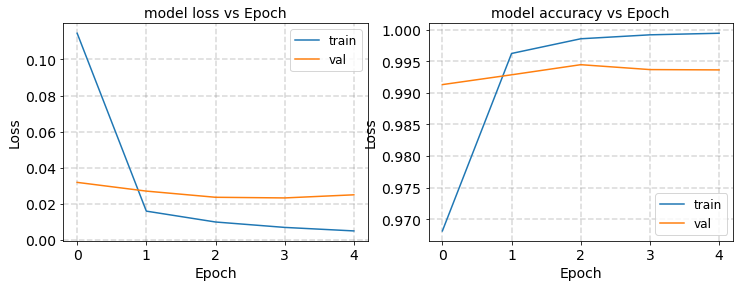

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1629 - accuracy: 0.9635 - val_loss: 0.1031 - val_accuracy: 0.9758
Epoch 2/5
1250/1250 - 2s - loss: 0.0472 - accuracy: 0.9855 - val_loss: 0.0914 - val_accuracy: 0.9781
Epoch 3/5
1250/1250 - 3s - loss: 0.0370 - accuracy: 0.9886 - val_loss: 0.0836 - val_accuracy: 0.9789
Epoch 4/5
1250/1250 - 3s - loss: 0.0308 - accuracy: 0.9908 - val_loss: 0.0755 - val_accuracy: 0.9780
Epoch 5/5
1250/1250 - 3s - loss: 0.0249 - accuracy: 0.9927 - val_loss: 0.0701 - val_accuracy: 0.9804


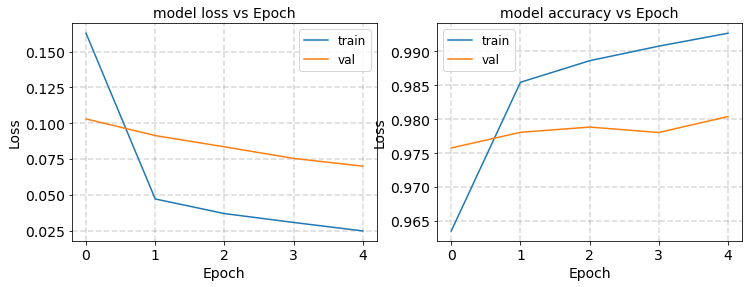

4
Epoch 1/5
1250/1250 - 3s - loss: 0.2056 - accuracy: 0.9440 - val_loss: 0.0814 - val_accuracy: 0.9765
Epoch 2/5
1250/1250 - 2s - loss: 0.0457 - accuracy: 0.9845 - val_loss: 0.0668 - val_accuracy: 0.9812
Epoch 3/5
1250/1250 - 2s - loss: 0.0320 - accuracy: 0.9904 - val_loss: 0.0636 - val_accuracy: 0.9820
Epoch 4/5
1250/1250 - 2s - loss: 0.0257 - accuracy: 0.9924 - val_loss: 0.0610 - val_accuracy: 0.9813
Epoch 5/5
1250/1250 - 2s - loss: 0.0213 - accuracy: 0.9938 - val_loss: 0.0606 - val_accuracy: 0.9837


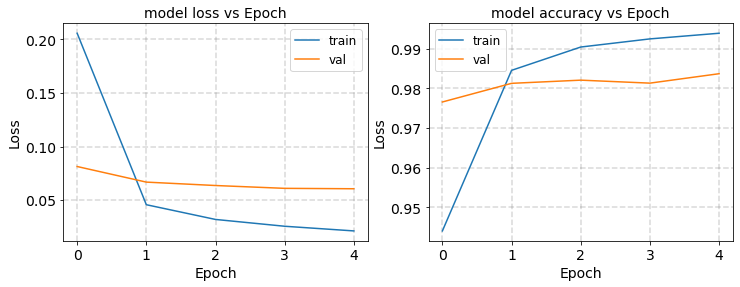

7
Epoch 1/5
1250/1250 - 2s - loss: 0.1343 - accuracy: 0.9771 - val_loss: 0.0636 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 2s - loss: 0.0072 - accuracy: 0.9985 - val_loss: 0.0618 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 2s - loss: 0.0044 - accuracy: 0.9994 - val_loss: 0.0632 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 2s - loss: 0.0030 - accuracy: 0.9998 - val_loss: 0.0652 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 2s - loss: 0.0024 - accuracy: 0.9998 - val_loss: 0.0678 - val_accuracy: 0.9882


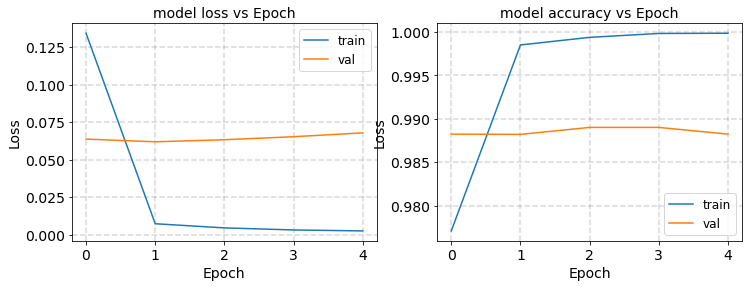

round2 [6 4 7 2]
6
Epoch 1/5
1250/1250 - 2s - loss: 0.2543 - accuracy: 0.9499 - val_loss: 0.0451 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 2s - loss: 0.0127 - accuracy: 0.9974 - val_loss: 0.0368 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 2s - loss: 0.0066 - accuracy: 0.9986 - val_loss: 0.0347 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 2s - loss: 0.0042 - accuracy: 0.9994 - val_loss: 0.0336 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 2s - loss: 0.0029 - accuracy: 0.9996 - val_loss: 0.0338 - val_accuracy: 0.9920


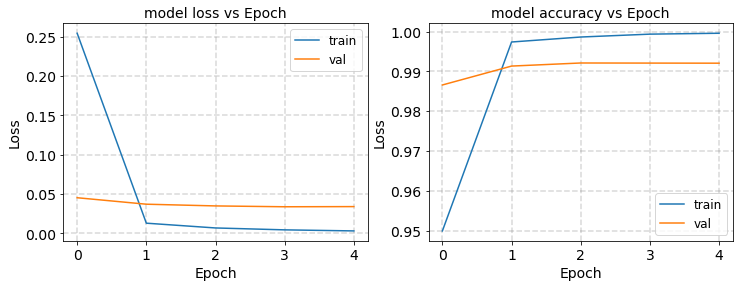

4
Epoch 1/5
1250/1250 - 2s - loss: 0.2077 - accuracy: 0.9539 - val_loss: 0.0597 - val_accuracy: 0.9804
Epoch 2/5
1250/1250 - 2s - loss: 0.0310 - accuracy: 0.9896 - val_loss: 0.0544 - val_accuracy: 0.9797
Epoch 3/5
1250/1250 - 2s - loss: 0.0229 - accuracy: 0.9925 - val_loss: 0.0537 - val_accuracy: 0.9828
Epoch 4/5
1250/1250 - 2s - loss: 0.0183 - accuracy: 0.9939 - val_loss: 0.0535 - val_accuracy: 0.9828
Epoch 5/5
1250/1250 - 2s - loss: 0.0152 - accuracy: 0.9950 - val_loss: 0.0567 - val_accuracy: 0.9828


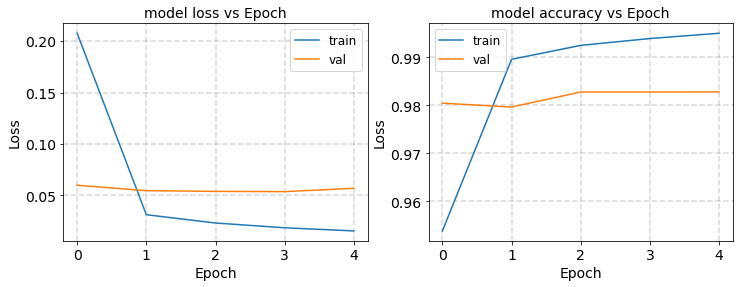

7
Epoch 1/5
1250/1250 - 2s - loss: 0.1082 - accuracy: 0.9824 - val_loss: 0.0799 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 2s - loss: 0.0033 - accuracy: 0.9998 - val_loss: 0.0776 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 2s - loss: 0.0026 - accuracy: 0.9998 - val_loss: 0.0804 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 2s - loss: 0.0022 - accuracy: 0.9998 - val_loss: 0.0758 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 2s - loss: 0.0019 - accuracy: 0.9998 - val_loss: 0.0849 - val_accuracy: 0.9898


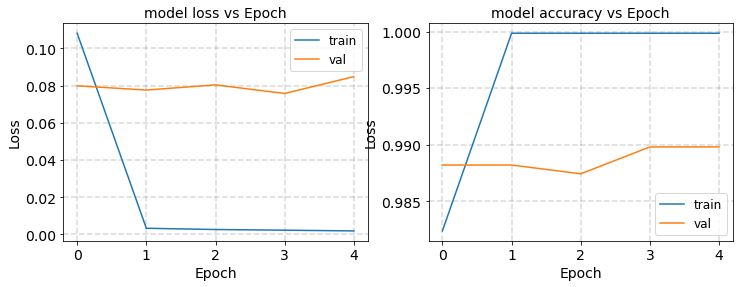

2
Epoch 1/5
1250/1250 - 2s - loss: 0.2930 - accuracy: 0.9440 - val_loss: 0.1121 - val_accuracy: 0.9655
Epoch 2/5
1250/1250 - 2s - loss: 0.0514 - accuracy: 0.9828 - val_loss: 0.0902 - val_accuracy: 0.9703
Epoch 3/5
1250/1250 - 2s - loss: 0.0373 - accuracy: 0.9880 - val_loss: 0.0783 - val_accuracy: 0.9781
Epoch 4/5
1250/1250 - 2s - loss: 0.0288 - accuracy: 0.9911 - val_loss: 0.0775 - val_accuracy: 0.9780
Epoch 5/5
1250/1250 - 2s - loss: 0.0244 - accuracy: 0.9926 - val_loss: 0.0762 - val_accuracy: 0.9780


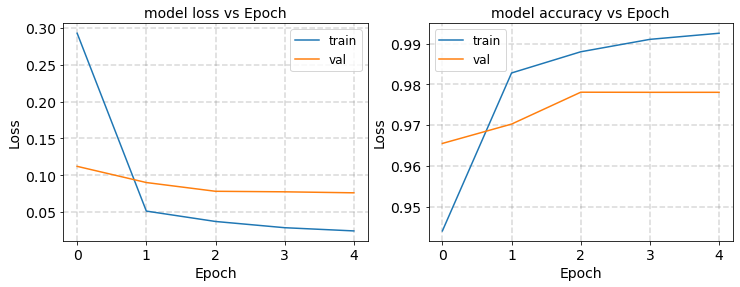

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_20 (None, 32)                50210     
_________________________________________________________________
prune_low_magnitude_dense_21 (None, 32)                2082      
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 132       
Total params: 52,425
Trainable params: 26,308
Non-trainable params: 26,117
_________________________________________________________________
Epoch 1/10
1250/1250 - 2s - loss: 0.4960 - accuracy: 0.8332 - val_loss: 0.2395 - val_accuracy: 0.9239
Epoch 2/10
1250/1250 - 1s - loss: 0.1847 - accuracy: 0.9454 - val_loss: 0.1784 - val_accuracy: 0.9427
Epoch 3/10
1250/1250 - 1s - loss: 0.14

/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spec

run 6
round0 [2 6 4 7]
2
Epoch 1/5
1250/1250 - 2s - loss: 0.1251 - accuracy: 0.9572 - val_loss: 0.0743 - val_accuracy: 0.9781
Epoch 2/5
1250/1250 - 2s - loss: 0.0381 - accuracy: 0.9879 - val_loss: 0.0677 - val_accuracy: 0.9781
Epoch 3/5
1250/1250 - 2s - loss: 0.0203 - accuracy: 0.9940 - val_loss: 0.0622 - val_accuracy: 0.9843
Epoch 4/5
1250/1250 - 2s - loss: 0.0116 - accuracy: 0.9969 - val_loss: 0.0638 - val_accuracy: 0.9851
Epoch 5/5
1250/1250 - 2s - loss: 0.0062 - accuracy: 0.9988 - val_loss: 0.0706 - val_accuracy: 0.9827


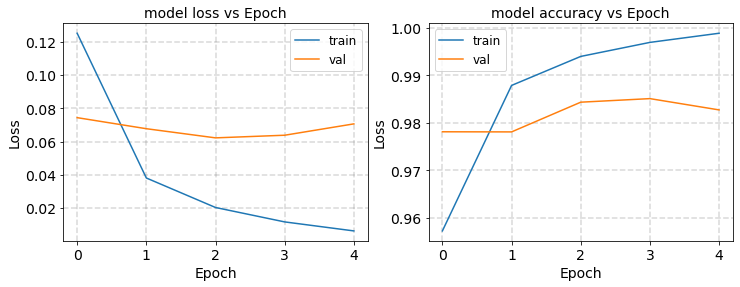

6
Epoch 1/5
1250/1250 - 2s - loss: 0.1510 - accuracy: 0.9584 - val_loss: 0.0493 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 2s - loss: 0.0324 - accuracy: 0.9908 - val_loss: 0.0393 - val_accuracy: 0.9873
Epoch 3/5
1250/1250 - 2s - loss: 0.0183 - accuracy: 0.9954 - val_loss: 0.0382 - val_accuracy: 0.9881
Epoch 4/5
1250/1250 - 2s - loss: 0.0105 - accuracy: 0.9976 - val_loss: 0.0401 - val_accuracy: 0.9889
Epoch 5/5
1250/1250 - 3s - loss: 0.0063 - accuracy: 0.9986 - val_loss: 0.0422 - val_accuracy: 0.9897


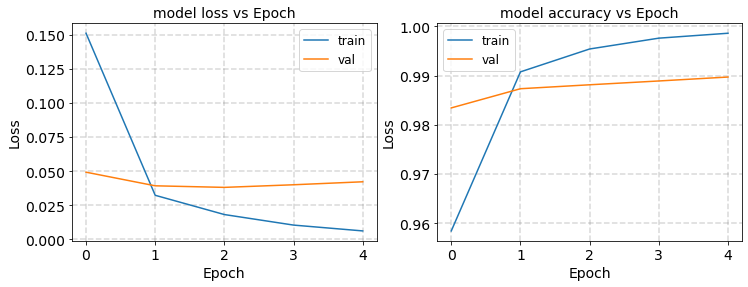

4
Epoch 1/5
1250/1250 - 3s - loss: 0.1785 - accuracy: 0.9494 - val_loss: 0.0563 - val_accuracy: 0.9819
Epoch 2/5
1250/1250 - 3s - loss: 0.0505 - accuracy: 0.9818 - val_loss: 0.0472 - val_accuracy: 0.9828
Epoch 3/5
1250/1250 - 3s - loss: 0.0365 - accuracy: 0.9880 - val_loss: 0.0414 - val_accuracy: 0.9875
Epoch 4/5
1250/1250 - 3s - loss: 0.0286 - accuracy: 0.9908 - val_loss: 0.0371 - val_accuracy: 0.9867
Epoch 5/5
1250/1250 - 3s - loss: 0.0226 - accuracy: 0.9930 - val_loss: 0.0373 - val_accuracy: 0.9875


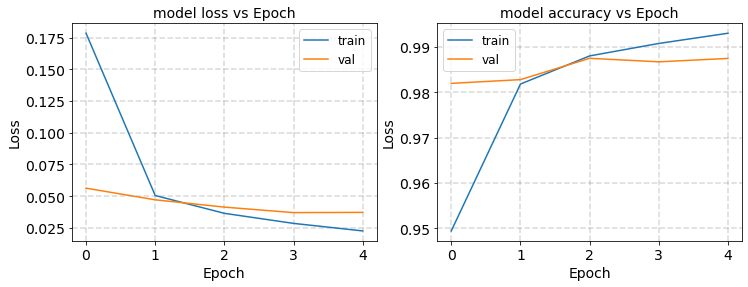

7
Epoch 1/5
1250/1250 - 3s - loss: 0.3459 - accuracy: 0.8502 - val_loss: 0.1595 - val_accuracy: 0.9685
Epoch 2/5
1250/1250 - 3s - loss: 0.1225 - accuracy: 0.9693 - val_loss: 0.1051 - val_accuracy: 0.9756
Epoch 3/5
1250/1250 - 3s - loss: 0.0837 - accuracy: 0.9780 - val_loss: 0.0863 - val_accuracy: 0.9796
Epoch 4/5
1250/1250 - 3s - loss: 0.0649 - accuracy: 0.9826 - val_loss: 0.0754 - val_accuracy: 0.9804
Epoch 5/5
1250/1250 - 3s - loss: 0.0516 - accuracy: 0.9846 - val_loss: 0.0649 - val_accuracy: 0.9804


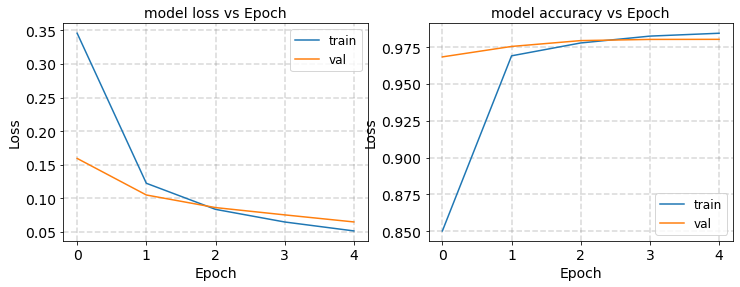

round1 [7 6 2 4]
7
Epoch 1/5
1250/1250 - 3s - loss: 0.0389 - accuracy: 0.9870 - val_loss: 0.0563 - val_accuracy: 0.9844
Epoch 2/5
1250/1250 - 3s - loss: 0.0310 - accuracy: 0.9901 - val_loss: 0.0538 - val_accuracy: 0.9804
Epoch 3/5
1250/1250 - 3s - loss: 0.0251 - accuracy: 0.9928 - val_loss: 0.0499 - val_accuracy: 0.9844
Epoch 4/5
1250/1250 - 3s - loss: 0.0207 - accuracy: 0.9938 - val_loss: 0.0473 - val_accuracy: 0.9851
Epoch 5/5
1250/1250 - 3s - loss: 0.0175 - accuracy: 0.9948 - val_loss: 0.0514 - val_accuracy: 0.9851


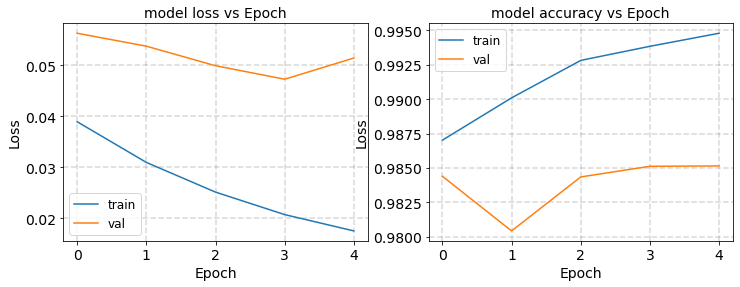

6
Epoch 1/5
1250/1250 - 3s - loss: 0.6154 - accuracy: 0.8540 - val_loss: 0.0978 - val_accuracy: 0.9710
Epoch 2/5
1250/1250 - 2s - loss: 0.0665 - accuracy: 0.9800 - val_loss: 0.0559 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 3s - loss: 0.0401 - accuracy: 0.9887 - val_loss: 0.0497 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 3s - loss: 0.0294 - accuracy: 0.9923 - val_loss: 0.0472 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 3s - loss: 0.0225 - accuracy: 0.9947 - val_loss: 0.0452 - val_accuracy: 0.9866


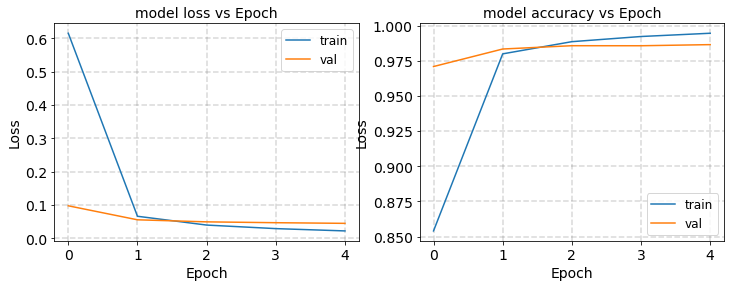

2
Epoch 1/5
1250/1250 - 2s - loss: 0.4863 - accuracy: 0.8532 - val_loss: 0.1356 - val_accuracy: 0.9617
Epoch 2/5
1250/1250 - 2s - loss: 0.1093 - accuracy: 0.9629 - val_loss: 0.1147 - val_accuracy: 0.9718
Epoch 3/5
1250/1250 - 2s - loss: 0.0903 - accuracy: 0.9722 - val_loss: 0.1062 - val_accuracy: 0.9734
Epoch 4/5
1250/1250 - 2s - loss: 0.0788 - accuracy: 0.9771 - val_loss: 0.0991 - val_accuracy: 0.9742
Epoch 5/5
1250/1250 - 2s - loss: 0.0710 - accuracy: 0.9801 - val_loss: 0.0987 - val_accuracy: 0.9718


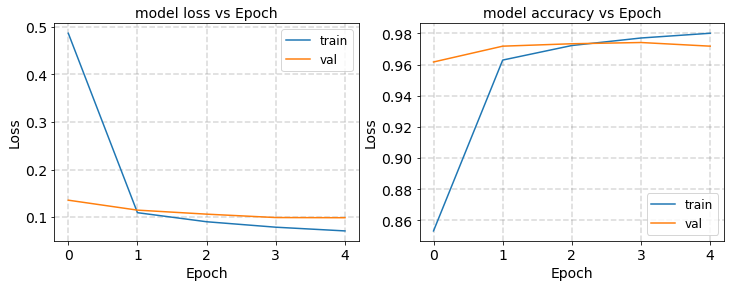

4
Epoch 1/5
1250/1250 - 2s - loss: 0.3935 - accuracy: 0.8575 - val_loss: 0.1117 - val_accuracy: 0.9671
Epoch 2/5
1250/1250 - 2s - loss: 0.1057 - accuracy: 0.9667 - val_loss: 0.0943 - val_accuracy: 0.9718
Epoch 3/5
1250/1250 - 2s - loss: 0.0858 - accuracy: 0.9727 - val_loss: 0.0861 - val_accuracy: 0.9726
Epoch 4/5
1250/1250 - 2s - loss: 0.0715 - accuracy: 0.9766 - val_loss: 0.0753 - val_accuracy: 0.9742
Epoch 5/5
1250/1250 - 2s - loss: 0.0615 - accuracy: 0.9797 - val_loss: 0.0741 - val_accuracy: 0.9741


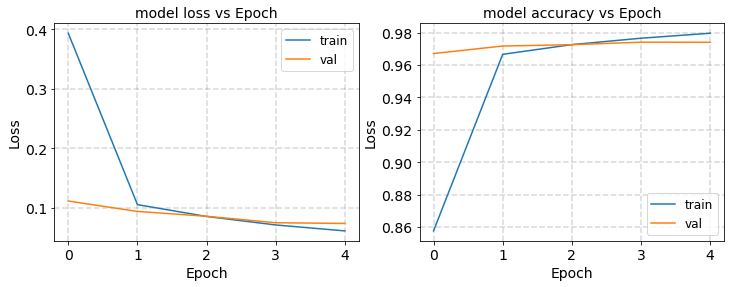

round2 [4 6 7 2]
4
Epoch 1/5
1250/1250 - 2s - loss: 0.0562 - accuracy: 0.9825 - val_loss: 0.0745 - val_accuracy: 0.9773
Epoch 2/5
1250/1250 - 2s - loss: 0.0521 - accuracy: 0.9837 - val_loss: 0.0774 - val_accuracy: 0.9773
Epoch 3/5
1250/1250 - 2s - loss: 0.0486 - accuracy: 0.9846 - val_loss: 0.0762 - val_accuracy: 0.9804
Epoch 4/5
1250/1250 - 2s - loss: 0.0428 - accuracy: 0.9867 - val_loss: 0.0814 - val_accuracy: 0.9773
Epoch 5/5
1250/1250 - 2s - loss: 0.0384 - accuracy: 0.9884 - val_loss: 0.0789 - val_accuracy: 0.9797


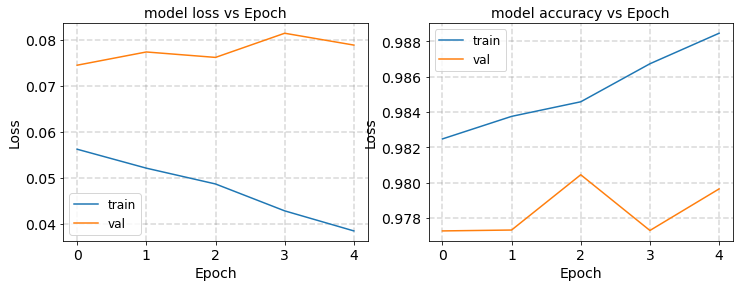

6
Epoch 1/5
1250/1250 - 2s - loss: 0.1876 - accuracy: 0.9537 - val_loss: 0.0653 - val_accuracy: 0.9827
Epoch 2/5
1250/1250 - 2s - loss: 0.0301 - accuracy: 0.9906 - val_loss: 0.0571 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 2s - loss: 0.0193 - accuracy: 0.9946 - val_loss: 0.0508 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 2s - loss: 0.0131 - accuracy: 0.9970 - val_loss: 0.0482 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 2s - loss: 0.0095 - accuracy: 0.9980 - val_loss: 0.0451 - val_accuracy: 0.9890


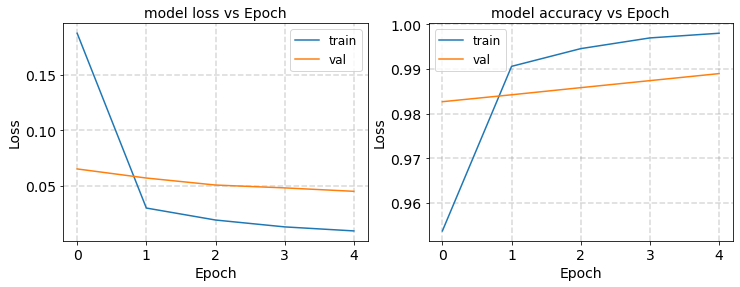

7
Epoch 1/5
1250/1250 - 2s - loss: 0.5590 - accuracy: 0.9115 - val_loss: 0.1104 - val_accuracy: 0.9725
Epoch 2/5
1250/1250 - 2s - loss: 0.0637 - accuracy: 0.9792 - val_loss: 0.0865 - val_accuracy: 0.9765
Epoch 3/5
1250/1250 - 2s - loss: 0.0414 - accuracy: 0.9867 - val_loss: 0.0786 - val_accuracy: 0.9819
Epoch 4/5
1250/1250 - 2s - loss: 0.0298 - accuracy: 0.9908 - val_loss: 0.0718 - val_accuracy: 0.9811
Epoch 5/5
1250/1250 - 2s - loss: 0.0213 - accuracy: 0.9939 - val_loss: 0.0690 - val_accuracy: 0.9827


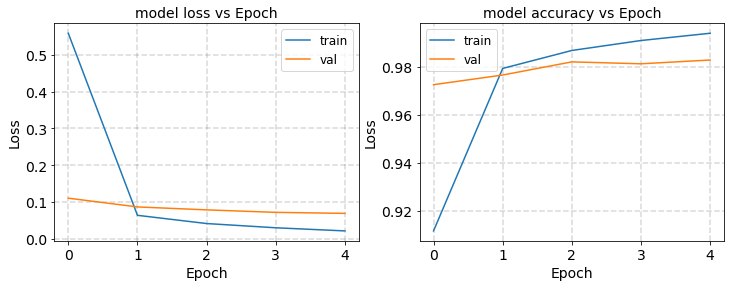

2
Epoch 1/5
1250/1250 - 2s - loss: 0.3595 - accuracy: 0.9092 - val_loss: 0.1246 - val_accuracy: 0.9593
Epoch 2/5
1250/1250 - 2s - loss: 0.0887 - accuracy: 0.9701 - val_loss: 0.0985 - val_accuracy: 0.9670
Epoch 3/5
1250/1250 - 2s - loss: 0.0596 - accuracy: 0.9803 - val_loss: 0.0801 - val_accuracy: 0.9749
Epoch 4/5
1250/1250 - 2s - loss: 0.0423 - accuracy: 0.9868 - val_loss: 0.0771 - val_accuracy: 0.9780
Epoch 5/5
1250/1250 - 2s - loss: 0.0323 - accuracy: 0.9909 - val_loss: 0.0696 - val_accuracy: 0.9804


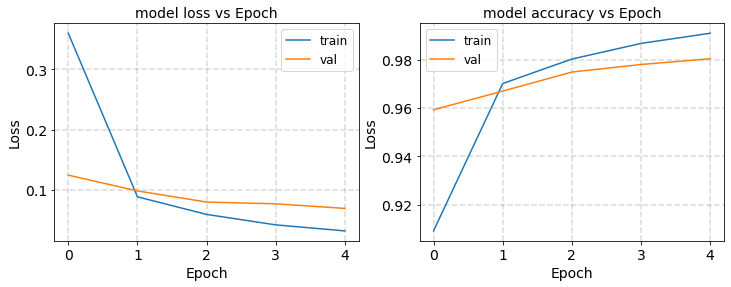

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_24 (None, 32)                50210     
_________________________________________________________________
prune_low_magnitude_dense_25 (None, 32)                2082      
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 132       
Total params: 52,425
Trainable params: 26,308
Non-trainable params: 26,117
_________________________________________________________________
Epoch 1/10
1250/1250 - 2s - loss: 0.4967 - accuracy: 0.8386 - val_loss: 0.3153 - val_accuracy: 0.8950
Epoch 2/10
1250/1250 - 1s - loss: 0.2425 - accuracy: 0.9237 - val_loss: 0.2708 - val_accuracy: 0.9075
Epoch 3/10
1250/1250 - 1s - loss: 0.20

/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spec

run 7
round0 [7 2 6 4]
7
Epoch 1/5
1250/1250 - 2s - loss: 0.0836 - accuracy: 0.9724 - val_loss: 0.0526 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 2s - loss: 0.0266 - accuracy: 0.9922 - val_loss: 0.0466 - val_accuracy: 0.9867
Epoch 3/5
1250/1250 - 2s - loss: 0.0172 - accuracy: 0.9951 - val_loss: 0.0426 - val_accuracy: 0.9867
Epoch 4/5
1250/1250 - 2s - loss: 0.0111 - accuracy: 0.9973 - val_loss: 0.0473 - val_accuracy: 0.9851
Epoch 5/5
1250/1250 - 2s - loss: 0.0067 - accuracy: 0.9986 - val_loss: 0.0491 - val_accuracy: 0.9867


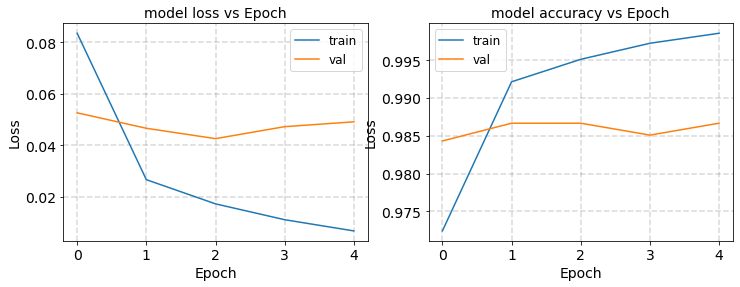

2
Epoch 1/5
1250/1250 - 2s - loss: 0.2021 - accuracy: 0.9551 - val_loss: 0.0617 - val_accuracy: 0.9797
Epoch 2/5
1250/1250 - 2s - loss: 0.0390 - accuracy: 0.9878 - val_loss: 0.0555 - val_accuracy: 0.9827
Epoch 3/5
1250/1250 - 2s - loss: 0.0256 - accuracy: 0.9929 - val_loss: 0.0533 - val_accuracy: 0.9812
Epoch 4/5
1250/1250 - 2s - loss: 0.0167 - accuracy: 0.9955 - val_loss: 0.0516 - val_accuracy: 0.9828
Epoch 5/5
1250/1250 - 2s - loss: 0.0101 - accuracy: 0.9974 - val_loss: 0.0552 - val_accuracy: 0.9844


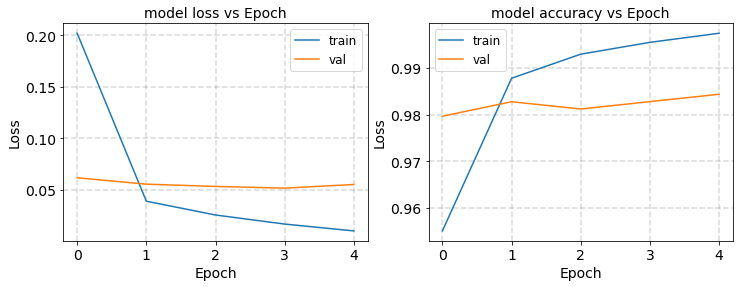

6
Epoch 1/5
1250/1250 - 2s - loss: 0.1417 - accuracy: 0.9631 - val_loss: 0.0430 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 2s - loss: 0.0241 - accuracy: 0.9928 - val_loss: 0.0354 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 2s - loss: 0.0119 - accuracy: 0.9970 - val_loss: 0.0305 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 2s - loss: 0.0062 - accuracy: 0.9988 - val_loss: 0.0293 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 2s - loss: 0.0033 - accuracy: 0.9995 - val_loss: 0.0290 - val_accuracy: 0.9929


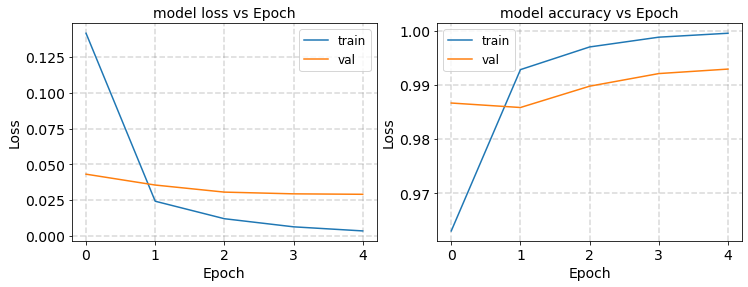

4
Epoch 1/5
1250/1250 - 2s - loss: 0.2039 - accuracy: 0.9524 - val_loss: 0.0611 - val_accuracy: 0.9827
Epoch 2/5
1250/1250 - 2s - loss: 0.0415 - accuracy: 0.9861 - val_loss: 0.0524 - val_accuracy: 0.9843
Epoch 3/5
1250/1250 - 2s - loss: 0.0277 - accuracy: 0.9909 - val_loss: 0.0502 - val_accuracy: 0.9851
Epoch 4/5
1250/1250 - 2s - loss: 0.0190 - accuracy: 0.9943 - val_loss: 0.0515 - val_accuracy: 0.9851
Epoch 5/5
1250/1250 - 2s - loss: 0.0131 - accuracy: 0.9966 - val_loss: 0.0533 - val_accuracy: 0.9812


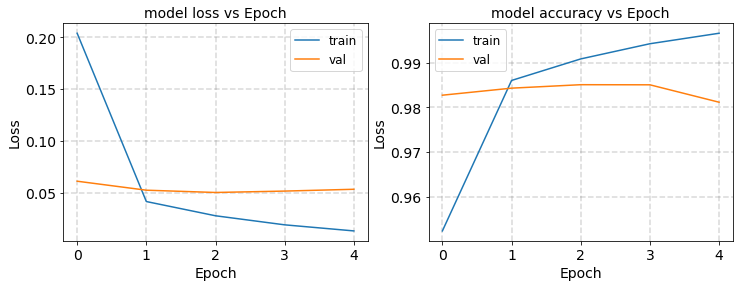

round1 [6 2 4 7]
6
Epoch 1/5
1250/1250 - 2s - loss: 0.0893 - accuracy: 0.9811 - val_loss: 0.0295 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 2s - loss: 0.0103 - accuracy: 0.9973 - val_loss: 0.0258 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 2s - loss: 0.0063 - accuracy: 0.9988 - val_loss: 0.0235 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 2s - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0243 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 2s - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0237 - val_accuracy: 0.9921


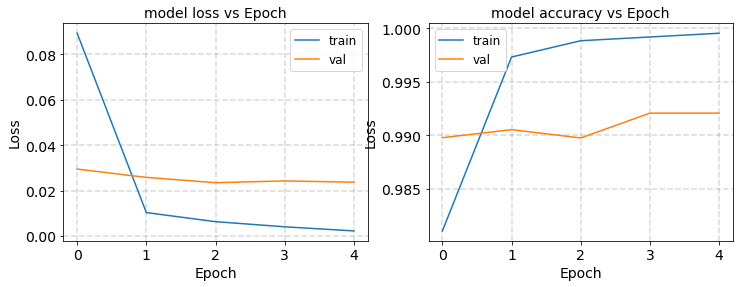

2
Epoch 1/5
1250/1250 - 2s - loss: 0.2014 - accuracy: 0.9612 - val_loss: 0.0946 - val_accuracy: 0.9670
Epoch 2/5
1250/1250 - 2s - loss: 0.0281 - accuracy: 0.9915 - val_loss: 0.0743 - val_accuracy: 0.9725
Epoch 3/5
1250/1250 - 2s - loss: 0.0141 - accuracy: 0.9959 - val_loss: 0.0696 - val_accuracy: 0.9749
Epoch 4/5
1250/1250 - 2s - loss: 0.0079 - accuracy: 0.9982 - val_loss: 0.0622 - val_accuracy: 0.9773
Epoch 5/5
1250/1250 - 2s - loss: 0.0049 - accuracy: 0.9990 - val_loss: 0.0587 - val_accuracy: 0.9781


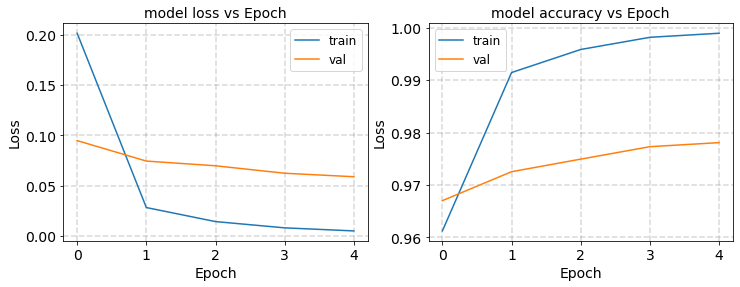

4
Epoch 1/5
1250/1250 - 2s - loss: 0.1377 - accuracy: 0.9690 - val_loss: 0.0526 - val_accuracy: 0.9844
Epoch 2/5
1250/1250 - 2s - loss: 0.0209 - accuracy: 0.9938 - val_loss: 0.0567 - val_accuracy: 0.9836
Epoch 3/5
1250/1250 - 2s - loss: 0.0127 - accuracy: 0.9972 - val_loss: 0.0633 - val_accuracy: 0.9851
Epoch 4/5
1250/1250 - 2s - loss: 0.0081 - accuracy: 0.9986 - val_loss: 0.0649 - val_accuracy: 0.9836
Epoch 5/5
1250/1250 - 2s - loss: 0.0051 - accuracy: 0.9992 - val_loss: 0.0658 - val_accuracy: 0.9844


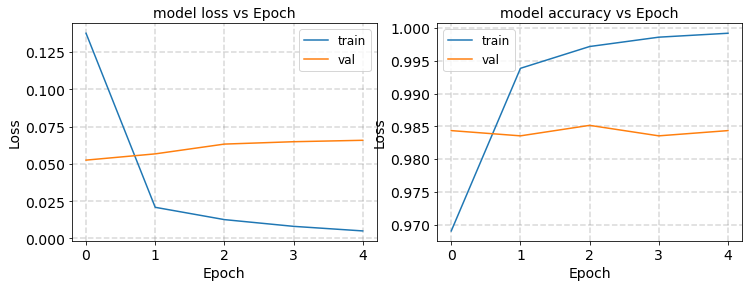

7
Epoch 1/5
1250/1250 - 2s - loss: 0.1998 - accuracy: 0.9602 - val_loss: 0.1128 - val_accuracy: 0.9781
Epoch 2/5
1250/1250 - 2s - loss: 0.0317 - accuracy: 0.9908 - val_loss: 0.0928 - val_accuracy: 0.9828
Epoch 3/5
1250/1250 - 2s - loss: 0.0202 - accuracy: 0.9938 - val_loss: 0.0851 - val_accuracy: 0.9844
Epoch 4/5
1250/1250 - 2s - loss: 0.0133 - accuracy: 0.9962 - val_loss: 0.0833 - val_accuracy: 0.9844
Epoch 5/5
1250/1250 - 2s - loss: 0.0087 - accuracy: 0.9977 - val_loss: 0.0808 - val_accuracy: 0.9851


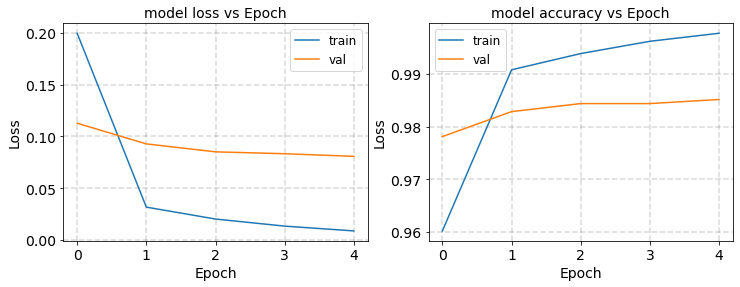

round2 [7 2 6 4]
7
Epoch 1/5
1250/1250 - 2s - loss: 0.0057 - accuracy: 0.9989 - val_loss: 0.0861 - val_accuracy: 0.9859
Epoch 2/5
1250/1250 - 2s - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0916 - val_accuracy: 0.9867
Epoch 3/5
1250/1250 - 2s - loss: 0.0022 - accuracy: 0.9998 - val_loss: 0.0967 - val_accuracy: 0.9867
Epoch 4/5
1250/1250 - 2s - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.1026 - val_accuracy: 0.9867
Epoch 5/5
1250/1250 - 2s - loss: 6.9969e-04 - accuracy: 1.0000 - val_loss: 0.1107 - val_accuracy: 0.9867


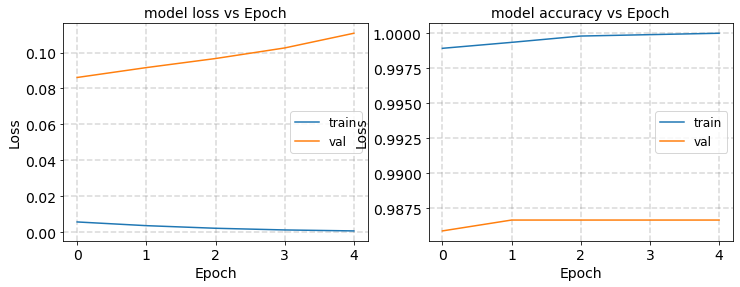

2
Epoch 1/5
1250/1250 - 2s - loss: 0.4259 - accuracy: 0.9484 - val_loss: 0.1284 - val_accuracy: 0.9663
Epoch 2/5
1250/1250 - 2s - loss: 0.0551 - accuracy: 0.9840 - val_loss: 0.1116 - val_accuracy: 0.9694
Epoch 3/5
1250/1250 - 2s - loss: 0.0348 - accuracy: 0.9888 - val_loss: 0.0959 - val_accuracy: 0.9710
Epoch 4/5
1250/1250 - 2s - loss: 0.0246 - accuracy: 0.9927 - val_loss: 0.0930 - val_accuracy: 0.9742
Epoch 5/5
1250/1250 - 2s - loss: 0.0180 - accuracy: 0.9952 - val_loss: 0.0871 - val_accuracy: 0.9757


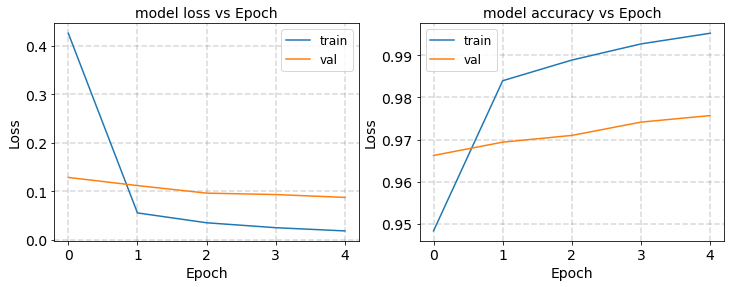

6
Epoch 1/5
1250/1250 - 2s - loss: 0.1964 - accuracy: 0.9556 - val_loss: 0.0503 - val_accuracy: 0.9827
Epoch 2/5
1250/1250 - 2s - loss: 0.0313 - accuracy: 0.9885 - val_loss: 0.0405 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 2s - loss: 0.0207 - accuracy: 0.9926 - val_loss: 0.0351 - val_accuracy: 0.9889
Epoch 4/5
1250/1250 - 2s - loss: 0.0150 - accuracy: 0.9950 - val_loss: 0.0323 - val_accuracy: 0.9889
Epoch 5/5
1250/1250 - 2s - loss: 0.0110 - accuracy: 0.9967 - val_loss: 0.0303 - val_accuracy: 0.9897


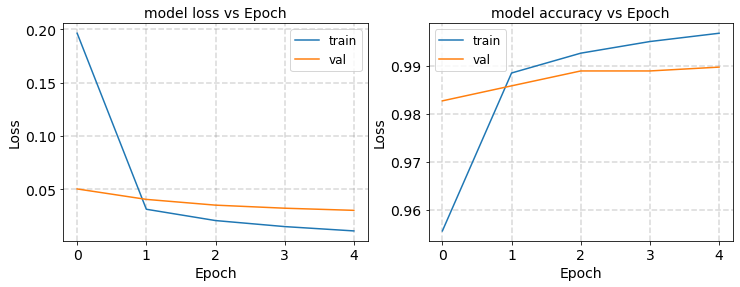

4
Epoch 1/5
1250/1250 - 2s - loss: 0.2082 - accuracy: 0.9522 - val_loss: 0.0711 - val_accuracy: 0.9796
Epoch 2/5
1250/1250 - 2s - loss: 0.0333 - accuracy: 0.9901 - val_loss: 0.0636 - val_accuracy: 0.9836
Epoch 3/5
1250/1250 - 2s - loss: 0.0231 - accuracy: 0.9931 - val_loss: 0.0634 - val_accuracy: 0.9828
Epoch 4/5
1250/1250 - 2s - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.0650 - val_accuracy: 0.9828
Epoch 5/5
1250/1250 - 2s - loss: 0.0120 - accuracy: 0.9968 - val_loss: 0.0652 - val_accuracy: 0.9828


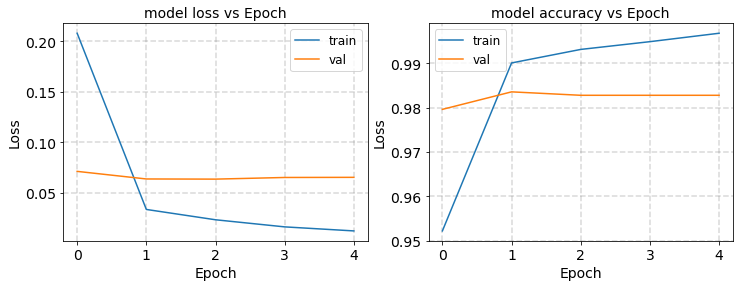

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_28 (None, 32)                50210     
_________________________________________________________________
prune_low_magnitude_dense_29 (None, 32)                2082      
_________________________________________________________________
dense_31 (Dense)             (None, 4)                 132       
Total params: 52,425
Trainable params: 26,308
Non-trainable params: 26,117
_________________________________________________________________
Epoch 1/10
1250/1250 - 1s - loss: 0.5918 - accuracy: 0.8237 - val_loss: 0.1957 - val_accuracy: 0.9453
Epoch 2/10
1250/1250 - 1s - loss: 0.1448 - accuracy: 0.9646 - val_loss: 0.1507 - val_accuracy: 0.9499
Epoch 3/10
1250/1250 - 1s - loss: 0.10

/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spec

run 8
round0 [7 4 6 2]
7
Epoch 1/5
1250/1250 - 3s - loss: 0.0839 - accuracy: 0.9698 - val_loss: 0.0508 - val_accuracy: 0.9875
Epoch 2/5
1250/1250 - 2s - loss: 0.0263 - accuracy: 0.9926 - val_loss: 0.0476 - val_accuracy: 0.9859
Epoch 3/5
1250/1250 - 2s - loss: 0.0174 - accuracy: 0.9955 - val_loss: 0.0448 - val_accuracy: 0.9883
Epoch 4/5
1250/1250 - 2s - loss: 0.0106 - accuracy: 0.9973 - val_loss: 0.0468 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 2s - loss: 0.0058 - accuracy: 0.9989 - val_loss: 0.0402 - val_accuracy: 0.9905


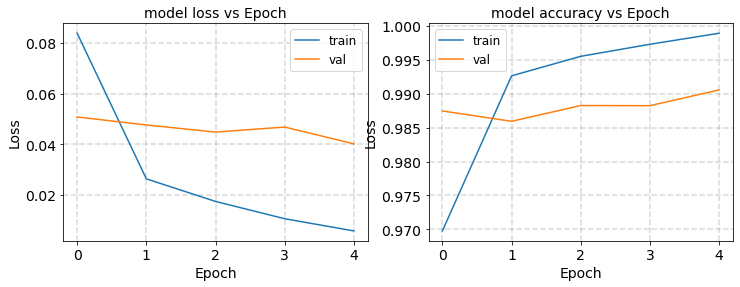

4
Epoch 1/5
1250/1250 - 3s - loss: 0.1519 - accuracy: 0.9581 - val_loss: 0.0661 - val_accuracy: 0.9812
Epoch 2/5
1250/1250 - 2s - loss: 0.0455 - accuracy: 0.9851 - val_loss: 0.0592 - val_accuracy: 0.9843
Epoch 3/5
1250/1250 - 2s - loss: 0.0311 - accuracy: 0.9904 - val_loss: 0.0516 - val_accuracy: 0.9851
Epoch 4/5
1250/1250 - 2s - loss: 0.0212 - accuracy: 0.9940 - val_loss: 0.0534 - val_accuracy: 0.9875
Epoch 5/5
1250/1250 - 2s - loss: 0.0144 - accuracy: 0.9967 - val_loss: 0.0517 - val_accuracy: 0.9914


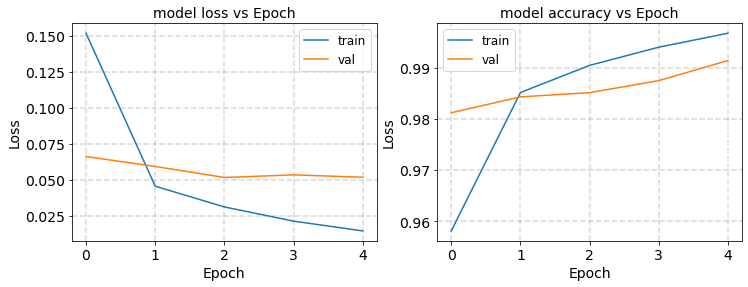

6
Epoch 1/5
1250/1250 - 2s - loss: 0.1341 - accuracy: 0.9643 - val_loss: 0.0424 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 2s - loss: 0.0281 - accuracy: 0.9907 - val_loss: 0.0346 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 2s - loss: 0.0177 - accuracy: 0.9947 - val_loss: 0.0314 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 2s - loss: 0.0109 - accuracy: 0.9973 - val_loss: 0.0297 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 2s - loss: 0.0063 - accuracy: 0.9987 - val_loss: 0.0289 - val_accuracy: 0.9897


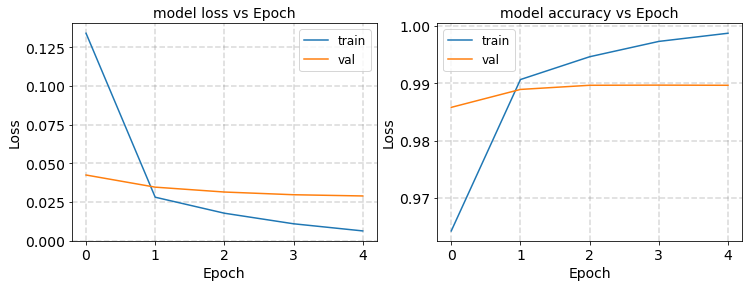

2
Epoch 1/5
1250/1250 - 2s - loss: 0.2628 - accuracy: 0.9226 - val_loss: 0.0913 - val_accuracy: 0.9718
Epoch 2/5
1250/1250 - 2s - loss: 0.0868 - accuracy: 0.9702 - val_loss: 0.0750 - val_accuracy: 0.9742
Epoch 3/5
1250/1250 - 2s - loss: 0.0634 - accuracy: 0.9780 - val_loss: 0.0708 - val_accuracy: 0.9788
Epoch 4/5
1250/1250 - 2s - loss: 0.0498 - accuracy: 0.9834 - val_loss: 0.0718 - val_accuracy: 0.9788
Epoch 5/5
1250/1250 - 2s - loss: 0.0393 - accuracy: 0.9874 - val_loss: 0.0691 - val_accuracy: 0.9796


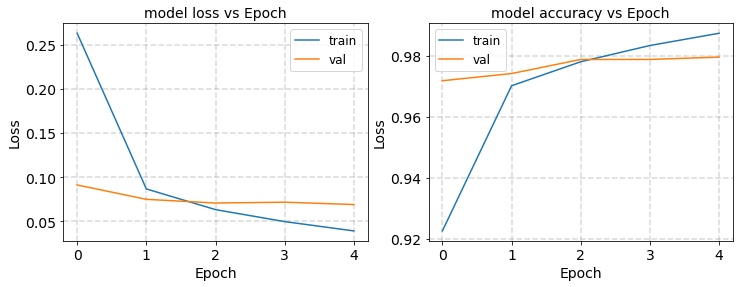

round1 [4 6 2 7]
4
Epoch 1/5
1250/1250 - 2s - loss: 0.1689 - accuracy: 0.9522 - val_loss: 0.0474 - val_accuracy: 0.9859
Epoch 2/5
1250/1250 - 2s - loss: 0.0343 - accuracy: 0.9886 - val_loss: 0.0417 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 2s - loss: 0.0215 - accuracy: 0.9933 - val_loss: 0.0387 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 2s - loss: 0.0149 - accuracy: 0.9959 - val_loss: 0.0383 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 2s - loss: 0.0097 - accuracy: 0.9977 - val_loss: 0.0420 - val_accuracy: 0.9898


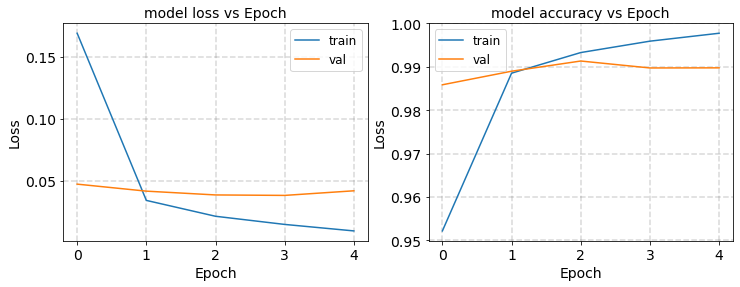

6
Epoch 1/5
1250/1250 - 2s - loss: 0.1832 - accuracy: 0.9509 - val_loss: 0.0427 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 2s - loss: 0.0223 - accuracy: 0.9936 - val_loss: 0.0392 - val_accuracy: 0.9881
Epoch 3/5
1250/1250 - 2s - loss: 0.0143 - accuracy: 0.9961 - val_loss: 0.0366 - val_accuracy: 0.9881
Epoch 4/5
1250/1250 - 2s - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.0365 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 2s - loss: 0.0067 - accuracy: 0.9981 - val_loss: 0.0391 - val_accuracy: 0.9897


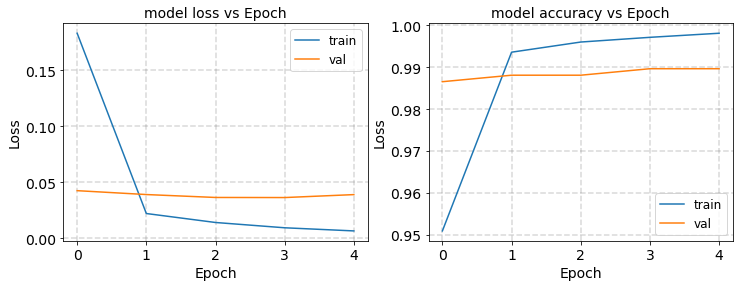

2
Epoch 1/5
1250/1250 - 2s - loss: 0.1820 - accuracy: 0.9632 - val_loss: 0.0723 - val_accuracy: 0.9765
Epoch 2/5
1250/1250 - 2s - loss: 0.0357 - accuracy: 0.9882 - val_loss: 0.0713 - val_accuracy: 0.9788
Epoch 3/5
1250/1250 - 2s - loss: 0.0284 - accuracy: 0.9900 - val_loss: 0.0730 - val_accuracy: 0.9765
Epoch 4/5
1250/1250 - 2s - loss: 0.0235 - accuracy: 0.9917 - val_loss: 0.0717 - val_accuracy: 0.9780
Epoch 5/5
1250/1250 - 2s - loss: 0.0195 - accuracy: 0.9934 - val_loss: 0.0757 - val_accuracy: 0.9772


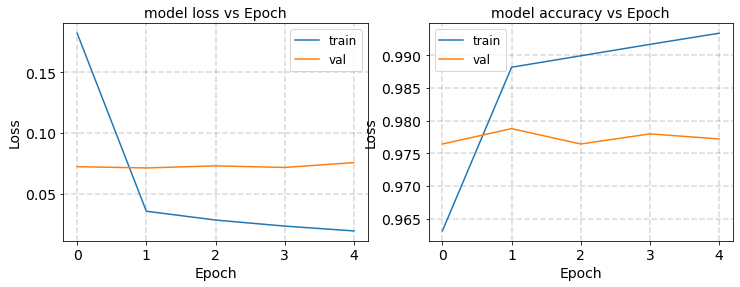

7
Epoch 1/5
1250/1250 - 2s - loss: 0.3164 - accuracy: 0.9371 - val_loss: 0.1144 - val_accuracy: 0.9827
Epoch 2/5
1250/1250 - 2s - loss: 0.0586 - accuracy: 0.9941 - val_loss: 0.0813 - val_accuracy: 0.9843
Epoch 3/5
1250/1250 - 2s - loss: 0.0346 - accuracy: 0.9963 - val_loss: 0.0733 - val_accuracy: 0.9828
Epoch 4/5
1250/1250 - 2s - loss: 0.0223 - accuracy: 0.9974 - val_loss: 0.0740 - val_accuracy: 0.9859
Epoch 5/5
1250/1250 - 2s - loss: 0.0150 - accuracy: 0.9980 - val_loss: 0.0738 - val_accuracy: 0.9812


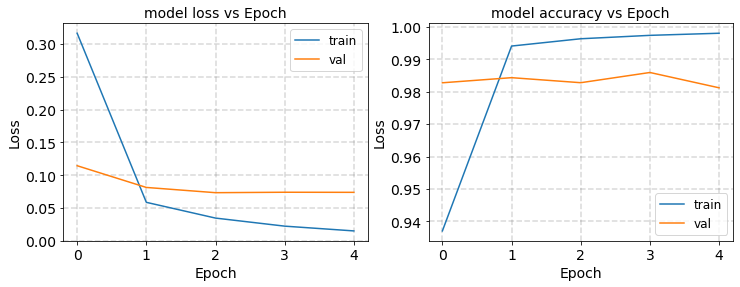

round2 [4 2 6 7]
4
Epoch 1/5
1250/1250 - 2s - loss: 0.2015 - accuracy: 0.9412 - val_loss: 0.0864 - val_accuracy: 0.9804
Epoch 2/5
1250/1250 - 2s - loss: 0.0431 - accuracy: 0.9863 - val_loss: 0.0768 - val_accuracy: 0.9867
Epoch 3/5
1250/1250 - 2s - loss: 0.0297 - accuracy: 0.9920 - val_loss: 0.0762 - val_accuracy: 0.9843
Epoch 4/5
1250/1250 - 2s - loss: 0.0225 - accuracy: 0.9951 - val_loss: 0.0741 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 2s - loss: 0.0185 - accuracy: 0.9962 - val_loss: 0.0770 - val_accuracy: 0.9875


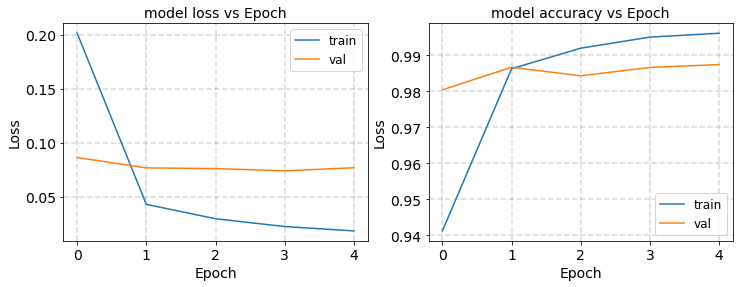

2
Epoch 1/5
1250/1250 - 2s - loss: 0.2711 - accuracy: 0.9362 - val_loss: 0.1067 - val_accuracy: 0.9734
Epoch 2/5
1250/1250 - 2s - loss: 0.0337 - accuracy: 0.9881 - val_loss: 0.0957 - val_accuracy: 0.9773
Epoch 3/5
1250/1250 - 2s - loss: 0.0205 - accuracy: 0.9929 - val_loss: 0.0963 - val_accuracy: 0.9781
Epoch 4/5
1250/1250 - 2s - loss: 0.0147 - accuracy: 0.9953 - val_loss: 0.0978 - val_accuracy: 0.9797
Epoch 5/5
1250/1250 - 2s - loss: 0.0103 - accuracy: 0.9970 - val_loss: 0.1017 - val_accuracy: 0.9773


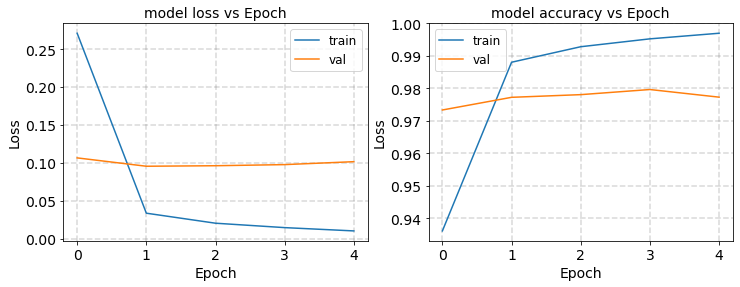

6
Epoch 1/5
1250/1250 - 2s - loss: 0.3647 - accuracy: 0.9131 - val_loss: 0.0903 - val_accuracy: 0.9717
Epoch 2/5
1250/1250 - 2s - loss: 0.0569 - accuracy: 0.9822 - val_loss: 0.0573 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 2s - loss: 0.0310 - accuracy: 0.9911 - val_loss: 0.0483 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 2s - loss: 0.0204 - accuracy: 0.9946 - val_loss: 0.0474 - val_accuracy: 0.9889
Epoch 5/5
1250/1250 - 2s - loss: 0.0146 - accuracy: 0.9963 - val_loss: 0.0478 - val_accuracy: 0.9897


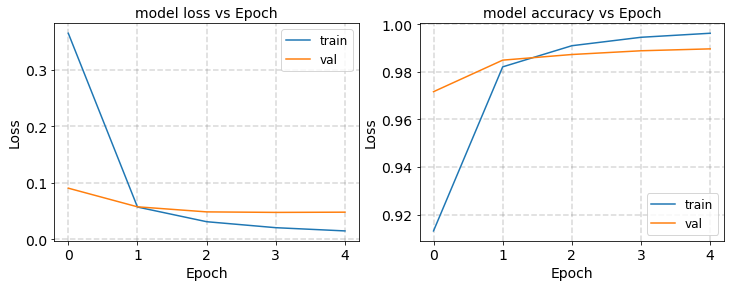

7
Epoch 1/5
1250/1250 - 2s - loss: 0.4227 - accuracy: 0.8884 - val_loss: 0.1268 - val_accuracy: 0.9630
Epoch 2/5
1250/1250 - 2s - loss: 0.0925 - accuracy: 0.9669 - val_loss: 0.0888 - val_accuracy: 0.9733
Epoch 3/5
1250/1250 - 2s - loss: 0.0647 - accuracy: 0.9771 - val_loss: 0.0735 - val_accuracy: 0.9804
Epoch 4/5
1250/1250 - 2s - loss: 0.0520 - accuracy: 0.9821 - val_loss: 0.0628 - val_accuracy: 0.9804
Epoch 5/5
1250/1250 - 2s - loss: 0.0442 - accuracy: 0.9853 - val_loss: 0.0611 - val_accuracy: 0.9827


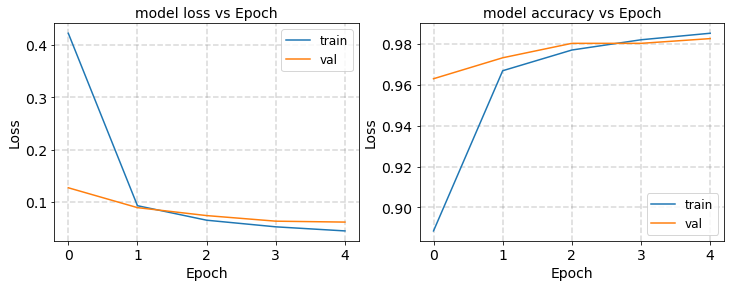

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_32 (None, 32)                50210     
_________________________________________________________________
prune_low_magnitude_dense_33 (None, 32)                2082      
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 132       
Total params: 52,425
Trainable params: 26,308
Non-trainable params: 26,117
_________________________________________________________________
Epoch 1/10
1250/1250 - 1s - loss: 0.8725 - accuracy: 0.7110 - val_loss: 0.3338 - val_accuracy: 0.9022
Epoch 2/10
1250/1250 - 1s - loss: 0.3130 - accuracy: 0.8977 - val_loss: 0.2678 - val_accuracy: 0.9076
Epoch 3/10
1250/1250 - 1s - loss: 0.27

/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spec

run 9
round0 [6 4 2 7]
6
Epoch 1/5
1250/1250 - 2s - loss: 0.1094 - accuracy: 0.9660 - val_loss: 0.0454 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 2s - loss: 0.0328 - accuracy: 0.9899 - val_loss: 0.0379 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 2s - loss: 0.0183 - accuracy: 0.9948 - val_loss: 0.0338 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 2s - loss: 0.0098 - accuracy: 0.9973 - val_loss: 0.0319 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 2s - loss: 0.0050 - accuracy: 0.9991 - val_loss: 0.0318 - val_accuracy: 0.9889


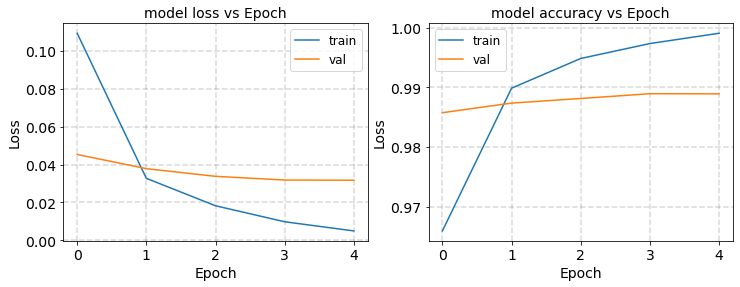

4
Epoch 1/5
1250/1250 - 2s - loss: 0.1570 - accuracy: 0.9509 - val_loss: 0.0581 - val_accuracy: 0.9852
Epoch 2/5
1250/1250 - 2s - loss: 0.0479 - accuracy: 0.9849 - val_loss: 0.0517 - val_accuracy: 0.9867
Epoch 3/5
1250/1250 - 2s - loss: 0.0329 - accuracy: 0.9902 - val_loss: 0.0490 - val_accuracy: 0.9844
Epoch 4/5
1250/1250 - 2s - loss: 0.0225 - accuracy: 0.9935 - val_loss: 0.0476 - val_accuracy: 0.9860
Epoch 5/5
1250/1250 - 2s - loss: 0.0149 - accuracy: 0.9964 - val_loss: 0.0520 - val_accuracy: 0.9852


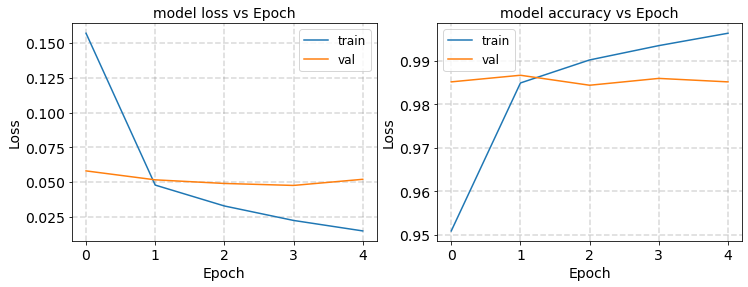

2
Epoch 1/5
1250/1250 - 2s - loss: 0.2189 - accuracy: 0.9389 - val_loss: 0.0826 - val_accuracy: 0.9789
Epoch 2/5
1250/1250 - 2s - loss: 0.0557 - accuracy: 0.9823 - val_loss: 0.0721 - val_accuracy: 0.9772
Epoch 3/5
1250/1250 - 2s - loss: 0.0378 - accuracy: 0.9879 - val_loss: 0.0711 - val_accuracy: 0.9772
Epoch 4/5
1250/1250 - 2s - loss: 0.0275 - accuracy: 0.9916 - val_loss: 0.0691 - val_accuracy: 0.9789
Epoch 5/5
1250/1250 - 2s - loss: 0.0197 - accuracy: 0.9941 - val_loss: 0.0671 - val_accuracy: 0.9780


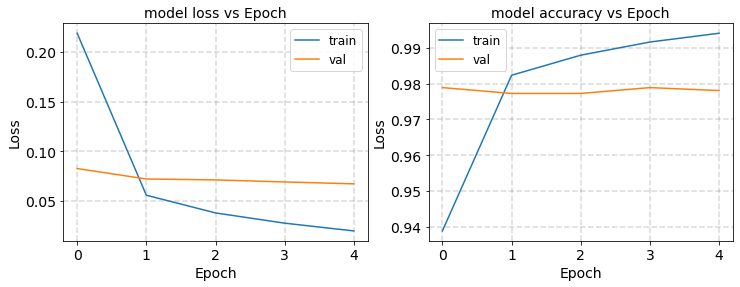

7
Epoch 1/5
1250/1250 - 2s - loss: 0.1798 - accuracy: 0.9535 - val_loss: 0.0834 - val_accuracy: 0.9733
Epoch 2/5
1250/1250 - 2s - loss: 0.0501 - accuracy: 0.9840 - val_loss: 0.0755 - val_accuracy: 0.9789
Epoch 3/5
1250/1250 - 2s - loss: 0.0400 - accuracy: 0.9877 - val_loss: 0.0719 - val_accuracy: 0.9805
Epoch 4/5
1250/1250 - 2s - loss: 0.0333 - accuracy: 0.9901 - val_loss: 0.0719 - val_accuracy: 0.9820
Epoch 5/5
1250/1250 - 2s - loss: 0.0277 - accuracy: 0.9922 - val_loss: 0.0681 - val_accuracy: 0.9851


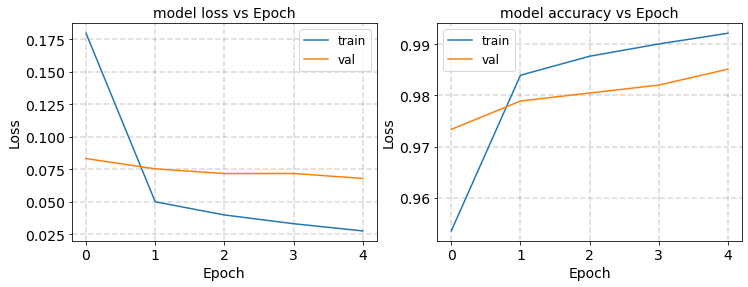

round1 [7 2 4 6]
7
Epoch 1/5
1250/1250 - 2s - loss: 0.0207 - accuracy: 0.9940 - val_loss: 0.0610 - val_accuracy: 0.9844
Epoch 2/5
1250/1250 - 2s - loss: 0.0158 - accuracy: 0.9955 - val_loss: 0.0649 - val_accuracy: 0.9851
Epoch 3/5
1250/1250 - 2s - loss: 0.0123 - accuracy: 0.9967 - val_loss: 0.0708 - val_accuracy: 0.9867
Epoch 4/5
1250/1250 - 2s - loss: 0.0094 - accuracy: 0.9977 - val_loss: 0.0690 - val_accuracy: 0.9875
Epoch 5/5
1250/1250 - 2s - loss: 0.0073 - accuracy: 0.9984 - val_loss: 0.0726 - val_accuracy: 0.9883


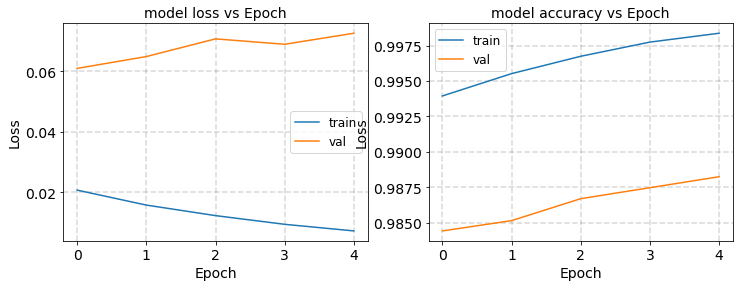

2
Epoch 1/5
1250/1250 - 2s - loss: 0.2517 - accuracy: 0.9496 - val_loss: 0.0830 - val_accuracy: 0.9772
Epoch 2/5
1250/1250 - 2s - loss: 0.0319 - accuracy: 0.9895 - val_loss: 0.0807 - val_accuracy: 0.9804
Epoch 3/5
1250/1250 - 2s - loss: 0.0219 - accuracy: 0.9933 - val_loss: 0.0752 - val_accuracy: 0.9820
Epoch 4/5
1250/1250 - 2s - loss: 0.0155 - accuracy: 0.9953 - val_loss: 0.0791 - val_accuracy: 0.9812
Epoch 5/5
1250/1250 - 2s - loss: 0.0111 - accuracy: 0.9970 - val_loss: 0.0793 - val_accuracy: 0.9820


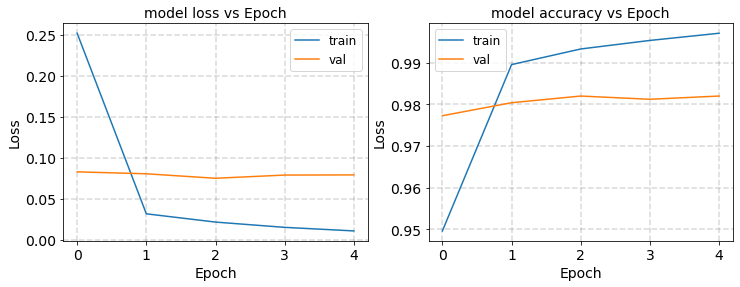

4
Epoch 1/5
1250/1250 - 2s - loss: 0.3619 - accuracy: 0.8692 - val_loss: 0.1635 - val_accuracy: 0.9625
Epoch 2/5
1250/1250 - 2s - loss: 0.0840 - accuracy: 0.9763 - val_loss: 0.1047 - val_accuracy: 0.9742
Epoch 3/5
1250/1250 - 2s - loss: 0.0502 - accuracy: 0.9846 - val_loss: 0.0909 - val_accuracy: 0.9758
Epoch 4/5
1250/1250 - 2s - loss: 0.0375 - accuracy: 0.9888 - val_loss: 0.0821 - val_accuracy: 0.9813
Epoch 5/5
1250/1250 - 2s - loss: 0.0290 - accuracy: 0.9911 - val_loss: 0.0781 - val_accuracy: 0.9821


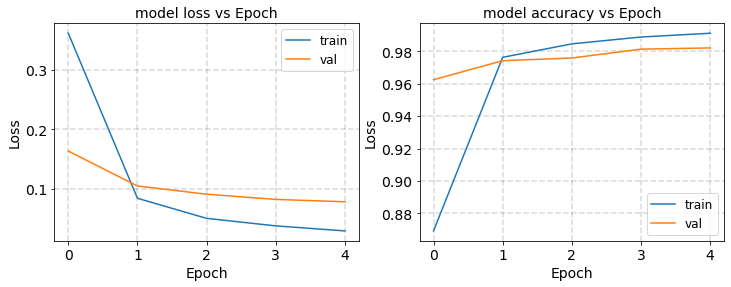

6
Epoch 1/5
1250/1250 - 2s - loss: 0.2787 - accuracy: 0.9139 - val_loss: 0.0882 - val_accuracy: 0.9733
Epoch 2/5
1250/1250 - 2s - loss: 0.0599 - accuracy: 0.9801 - val_loss: 0.0514 - val_accuracy: 0.9812
Epoch 3/5
1250/1250 - 2s - loss: 0.0345 - accuracy: 0.9889 - val_loss: 0.0470 - val_accuracy: 0.9843
Epoch 4/5
1250/1250 - 2s - loss: 0.0228 - accuracy: 0.9925 - val_loss: 0.0369 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 2s - loss: 0.0140 - accuracy: 0.9958 - val_loss: 0.0381 - val_accuracy: 0.9881


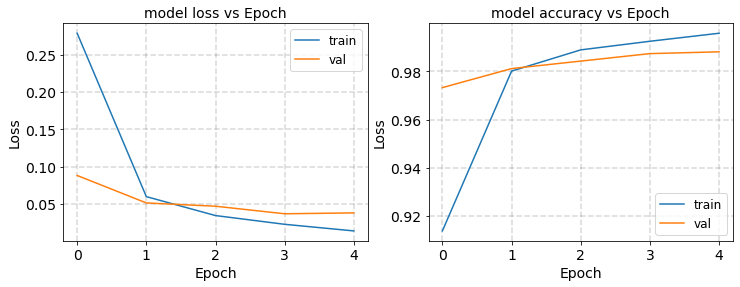

round2 [4 2 6 7]
4
Epoch 1/5
1250/1250 - 2s - loss: 0.1765 - accuracy: 0.9557 - val_loss: 0.0837 - val_accuracy: 0.9820
Epoch 2/5
1250/1250 - 2s - loss: 0.0420 - accuracy: 0.9861 - val_loss: 0.0740 - val_accuracy: 0.9844
Epoch 3/5
1250/1250 - 2s - loss: 0.0304 - accuracy: 0.9900 - val_loss: 0.0720 - val_accuracy: 0.9859
Epoch 4/5
1250/1250 - 2s - loss: 0.0231 - accuracy: 0.9926 - val_loss: 0.0705 - val_accuracy: 0.9859
Epoch 5/5
1250/1250 - 2s - loss: 0.0185 - accuracy: 0.9945 - val_loss: 0.0732 - val_accuracy: 0.9867


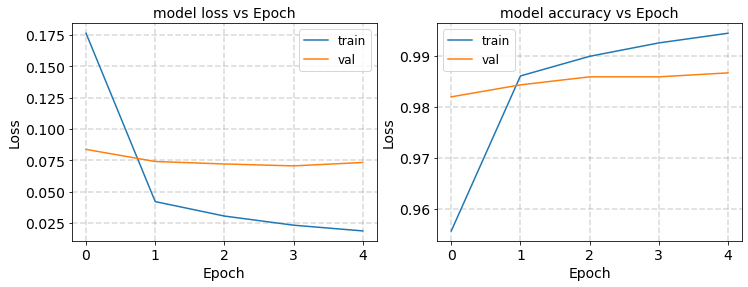

2
Epoch 1/5
1250/1250 - 2s - loss: 0.3073 - accuracy: 0.9153 - val_loss: 0.1031 - val_accuracy: 0.9695
Epoch 2/5
1250/1250 - 2s - loss: 0.0516 - accuracy: 0.9829 - val_loss: 0.0900 - val_accuracy: 0.9757
Epoch 3/5
1250/1250 - 2s - loss: 0.0389 - accuracy: 0.9879 - val_loss: 0.0846 - val_accuracy: 0.9757
Epoch 4/5
1250/1250 - 2s - loss: 0.0322 - accuracy: 0.9893 - val_loss: 0.0799 - val_accuracy: 0.9789
Epoch 5/5
1250/1250 - 2s - loss: 0.0278 - accuracy: 0.9913 - val_loss: 0.0761 - val_accuracy: 0.9820


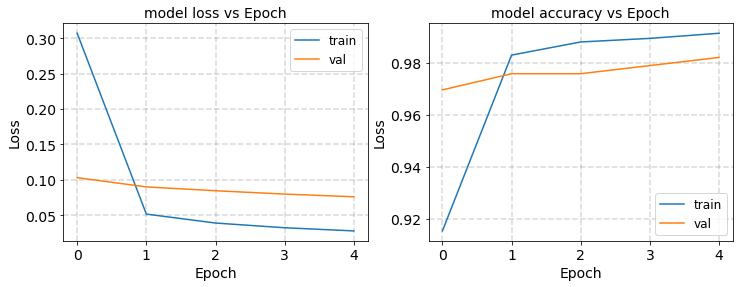

6
Epoch 1/5
1250/1250 - 2s - loss: 0.2163 - accuracy: 0.9347 - val_loss: 0.0922 - val_accuracy: 0.9741
Epoch 2/5
1250/1250 - 2s - loss: 0.0610 - accuracy: 0.9843 - val_loss: 0.0684 - val_accuracy: 0.9819
Epoch 3/5
1250/1250 - 2s - loss: 0.0428 - accuracy: 0.9895 - val_loss: 0.0597 - val_accuracy: 0.9851
Epoch 4/5
1250/1250 - 2s - loss: 0.0327 - accuracy: 0.9922 - val_loss: 0.0528 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 2s - loss: 0.0263 - accuracy: 0.9941 - val_loss: 0.0511 - val_accuracy: 0.9874


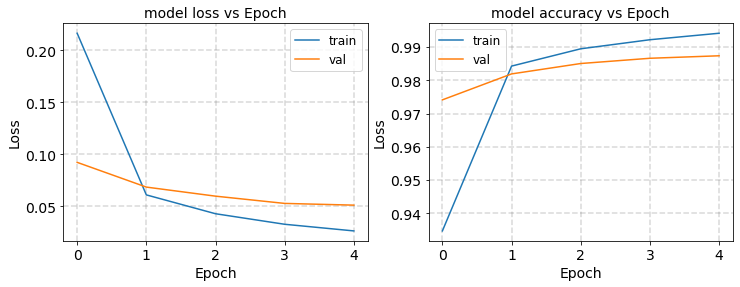

7
Epoch 1/5
1250/1250 - 2s - loss: 0.4638 - accuracy: 0.9180 - val_loss: 0.1009 - val_accuracy: 0.9702
Epoch 2/5
1250/1250 - 2s - loss: 0.0464 - accuracy: 0.9850 - val_loss: 0.0792 - val_accuracy: 0.9757
Epoch 3/5
1250/1250 - 2s - loss: 0.0324 - accuracy: 0.9897 - val_loss: 0.0636 - val_accuracy: 0.9773
Epoch 4/5
1250/1250 - 2s - loss: 0.0247 - accuracy: 0.9917 - val_loss: 0.0583 - val_accuracy: 0.9789
Epoch 5/5
1250/1250 - 2s - loss: 0.0187 - accuracy: 0.9944 - val_loss: 0.0542 - val_accuracy: 0.9836


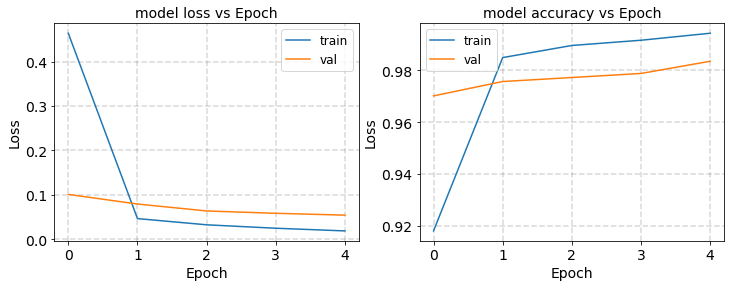

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_36 (None, 32)                50210     
_________________________________________________________________
prune_low_magnitude_dense_37 (None, 32)                2082      
_________________________________________________________________
dense_39 (Dense)             (None, 4)                 132       
Total params: 52,425
Trainable params: 26,308
Non-trainable params: 26,117
_________________________________________________________________
Epoch 1/10
1250/1250 - 1s - loss: 0.4024 - accuracy: 0.8788 - val_loss: 0.2278 - val_accuracy: 0.9311
Epoch 2/10
1250/1250 - 1s - loss: 0.1581 - accuracy: 0.9562 - val_loss: 0.1940 - val_accuracy: 0.9420
Epoch 3/10
1250/1250 - 1s - loss: 0.13

In [4]:
%%time
series = [2,4,6,7]
num_runs = 10
name = '2467_seq_prune_08_2_32_run'
for i in range(num_runs):
    print(f'run {i}')
    full_name = name + str(i)
    
    
    model, history = nc.make_train_sequential_model(x_train=x_train,
                                  y_train=y_train,
                                  x_test=x_test,
                                  y_test=y_test,
                                  series=series,
                                  num_hidden_layers=2,
                                  num_hidden_nodes=32,
                                  num_output_nodes=4,
                                  pruning=0.8,
                                  epochs_per_numeral=5,
                                  num_cycles = 3, 
                                  verbose=2,
                                  summary=False)
    
    exp_dict[full_name] = nc.get_n_cuts_and_p_value(
                        model = model,
                        model_history = history,
                        num_clusters=4,
                        random_state=None,
                        identity=False,
                        start=1,
                        num_shuffle_trials=20)


#### Convert Results to a dataframe

In [5]:
df = pd.DataFrame(exp_dict)
df = df.T
df_models = df.iloc[:, 0]
df.columns = ['model','N_cut','Mean_n_cut_rand', 'Std_n_cut_rand', 'Ste_n_cut_rand', 'Percentile','P_value', 'Significance','Direction', 'Accuracy']
df = df.drop('model', axis=1)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2467_seq_prune_08_2_32_run0  1.52316         1.53754        0.02084   
2467_seq_prune_08_2_32_run1  1.51753         1.59207        0.18714   
2467_seq_prune_08_2_32_run2  1.47103         1.51506      0.0183454   
2467_seq_prune_08_2_32_run3  1.51981         1.60823       0.108176   
2467_seq_prune_08_2_32_run4  1.46399         1.50289      0.0353298   
2467_seq_prune_08_2_32_run5  1.47868         1.52698      0.0234454   
2467_seq_prune_08_2_32_run6    1.528         1.58276      0.0836633   
2467_seq_prune_08_2_32_run7  1.62022         1.55342      0.0482675   
2467_seq_prune_08_2_32_run8  1.55488         1.55882      0.0405855   
2467_seq_prune_08_2_32_run9  1.49504         1.50853      0.0172665   

                            Ste_n_cut_rand Percentile P_value Significance  \
2467_seq_prune_08_2_32_run0     0.00465996         25     0.5           No   
2467_seq_prune_08_2_32_run1      0.0418459         60     0.8           No   
2467_seq_prune_08_2_32_run2     0.00410215          0       0          Yes   
2467_seq_prune_08_2_32_run3      0.0241889         10     0.2           No   
2467_seq_prune_08_2_32_run4     0.00789998         15     0.3           No   
2467_seq_prune_08_2_32_run5     0.00524256          0       0          Yes   
2467_seq_prune_08_2_32_run6      0.0187077         25     0.5           No   
2467_seq_prune_08_2_32_run7      0.0107929         90     0.2           No   
2467_seq_prune_08_2_32_run8      0.0090752         55     0.9           No   
2467_seq_prune_08_2_32_run9      0.0038609         30     0.6           No   

                            Direction  Accuracy  
2467_seq_prune_08_2_32_run0   smaller    0.9444  
2467_seq_prune_08_2_32_run1    larger  0.917725  
2467_seq_prune_08_2_32_run2   smaller  0.950575  
2467_seq_prune_08_2_32_run3   smaller   0.95445  
2467_seq_prune_08_2_32_run4   smaller  0.953025  
2467_seq_prune_08_2_32_run5   smaller  0.962375  
2467_seq_prune_08_2_32_run6   smaller  0.932625  
2467_seq_prune_08_2_32_run7    larger   0.96395  
2467_seq_prune_08_2_32_run8    larger   0.93325  
2467_seq_prune_08_2_32_run9   smaller   0.94975

#### Save dataframe

In [6]:
import pickle
path = './Exps/'
with open(path + 'df_'+ name, 'wb') as fp:
    pickle.dump(df, fp)
    
with open(path + 'df_'+ name, 'rb') as fp:
    df = pickle.load(fp)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2467_seq_prune_08_2_32_run0  1.52316         1.53754        0.02084   
2467_seq_prune_08_2_32_run1  1.51753         1.59207        0.18714   
2467_seq_prune_08_2_32_run2  1.47103         1.51506      0.0183454   
2467_seq_prune_08_2_32_run3  1.51981         1.60823       0.108176   
2467_seq_prune_08_2_32_run4  1.46399         1.50289      0.0353298   
2467_seq_prune_08_2_32_run5  1.47868         1.52698      0.0234454   
2467_seq_prune_08_2_32_run6    1.528         1.58276      0.0836633   
2467_seq_prune_08_2_32_run7  1.62022         1.55342      0.0482675   
2467_seq_prune_08_2_32_run8  1.55488         1.55882      0.0405855   
2467_seq_prune_08_2_32_run9  1.49504         1.50853      0.0172665   

                            Ste_n_cut_rand Percentile P_value Significance  \
2467_seq_prune_08_2_32_run0     0.00465996         25     0.5           No   
2467_seq_prune_08_2_32_run1      0.0418459         60     0.8           No   
2467_seq_prune_08_2_32_run2     0.00410215          0       0          Yes   
2467_seq_prune_08_2_32_run3      0.0241889         10     0.2           No   
2467_seq_prune_08_2_32_run4     0.00789998         15     0.3           No   
2467_seq_prune_08_2_32_run5     0.00524256          0       0          Yes   
2467_seq_prune_08_2_32_run6      0.0187077         25     0.5           No   
2467_seq_prune_08_2_32_run7      0.0107929         90     0.2           No   
2467_seq_prune_08_2_32_run8      0.0090752         55     0.9           No   
2467_seq_prune_08_2_32_run9      0.0038609         30     0.6           No   

                            Direction  Accuracy  
2467_seq_prune_08_2_32_run0   smaller    0.9444  
2467_seq_prune_08_2_32_run1    larger  0.917725  
2467_seq_prune_08_2_32_run2   smaller  0.950575  
2467_seq_prune_08_2_32_run3   smaller   0.95445  
2467_seq_prune_08_2_32_run4   smaller  0.953025  
2467_seq_prune_08_2_32_run5   smaller  0.962375  
2467_seq_prune_08_2_32_run6   smaller  0.932625  
2467_seq_prune_08_2_32_run7    larger   0.96395  
2467_seq_prune_08_2_32_run8    larger   0.93325  
2467_seq_prune_08_2_32_run9   smaller   0.94975

In [7]:
df_models[0].layers[1].get_weights()[0]

array([[ 0.        ,  0.0771052 ,  0.        , ...,  0.        ,
         0.        ,  0.07314757],
       [ 0.        ,  0.07520937, -0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.        , ...,  0.        ,
         0.        , -0.        ],
       ...,
       [-0.        , -0.        , -0.        , ...,  0.        ,
         0.        , -0.08057971],
       [ 0.        , -0.        , -0.        , ...,  0.        ,
        -0.        ,  0.        ],
       [-0.        , -0.        ,  0.0801307 , ..., -0.        ,
         0.        , -0.        ]], dtype=float32)

#### Look at results of first experiment

In [8]:
for val in exp_dict[name + str(0)]:
    print(val)

1.5231583605339363
1.5375424334900587
0.02083997701802751
0.0046599605261842866
25.0
0.5
No
smaller
0.9444000124931335
